# Objective : Wine Class Classification

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)


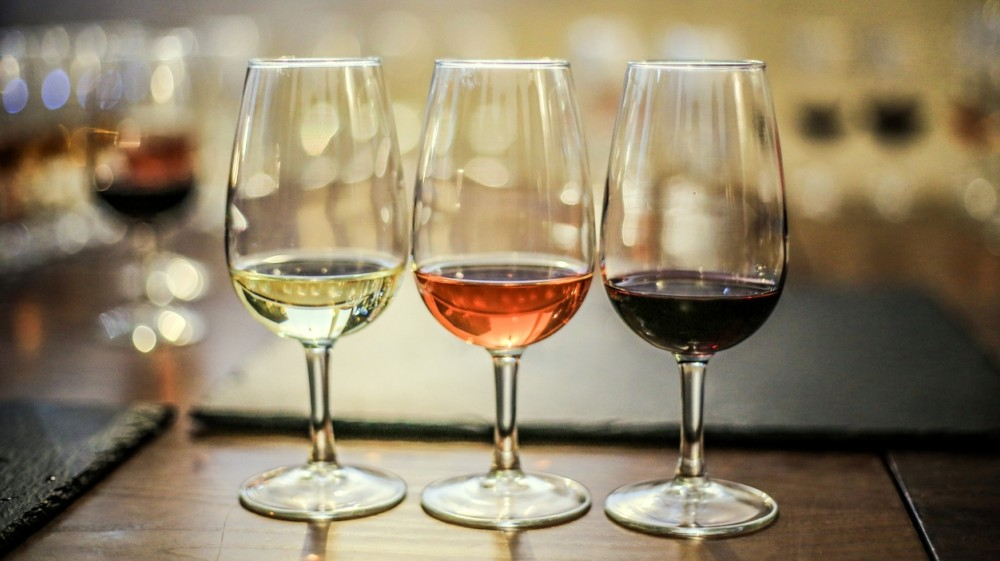

# 1. Load Python Modules

In [93]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [94]:
file_path=r"wine_dataset.csv"
wine_df=pd.read_csv(file_path)
wine_df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

# 3. Basic Inspection on given dataset

In [95]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table describe")
    print(table.describe())

basic_inspection_dataset(wine_df)


top 5 rows - using head
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proli

In [96]:
def clasify(x):
    if x==1:
        return '1'
    elif x==2:
        return '2'
    else:
        return '3'
wine_df['target']=wine_df['target'].apply(clasify)
wine_df['target'].astype('category')   
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                           object
dtype: object

### Observations - dataset

- Have 178 Sample with Varaibles 14
- There is no null values in the dataset


#### Categorical Variables:
- 'target'


#### Numerical Variables:
- 'alcohol'
- 'malic_acid'
- 'ash'
- 'alcalinity_of_ash'
- 'magnesium'
- 'total_phenols'
- 'flavanoids'
- 'nonflavanoid_phenols'
- 'proanthocyanins'
- 'color_intensity'
- 'hue'
- 'od280/od315_of_diluted_wines'
- 'proline'

      

In [97]:
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                           object
dtype: object

# 4. Handling Missing Values - Categorical - Variables

In [98]:
# check for missing values - for confirmation
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

# 5. Categorical- UniVariate - Analysis -Using Pipeline

In [99]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

target frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   1   |    71     |
| 1 |   3   |    59     |
| 2 |   2   |    48     |
+---+-------+-----------+
target Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   1   |    71     |        39.89         |
| 1 |   3   |    59     |        33.15         |
| 2 |   2   |    48     |        26.97         |
+---+-------+-----------+----------------------+


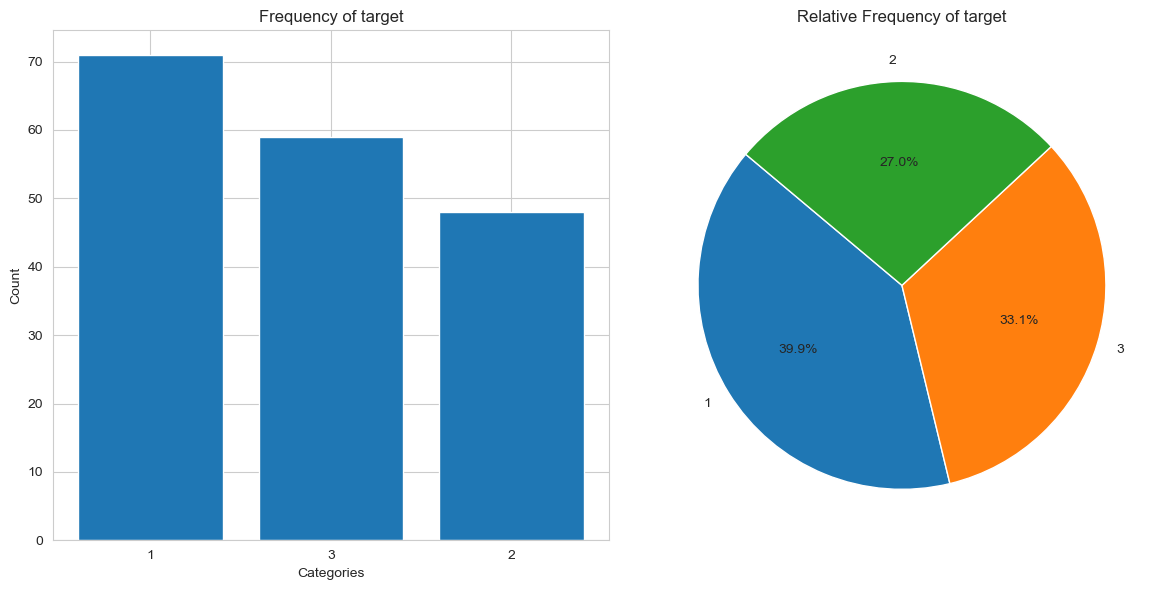

In [100]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(wine_df)

# 6. Handling Missing Values in Numerical Columns

In [101]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [102]:
wine_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

# 7. Numerical - UniVariate - Analysis - Using -Pipeline

In [103]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()        
        

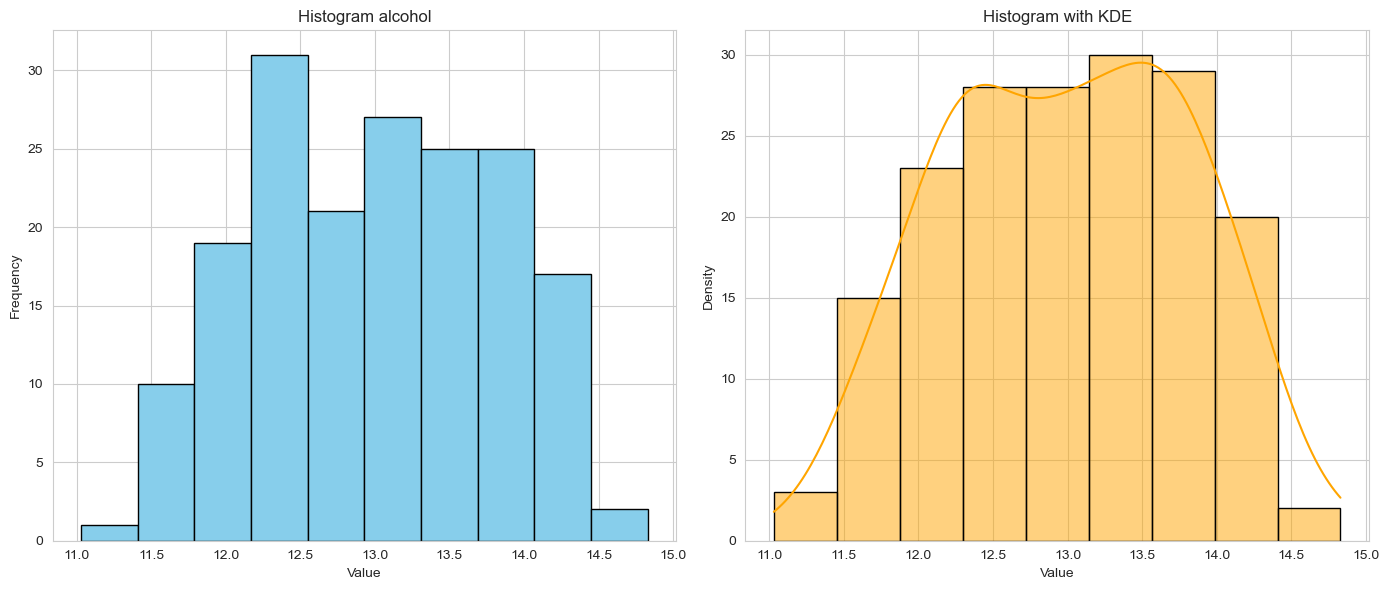

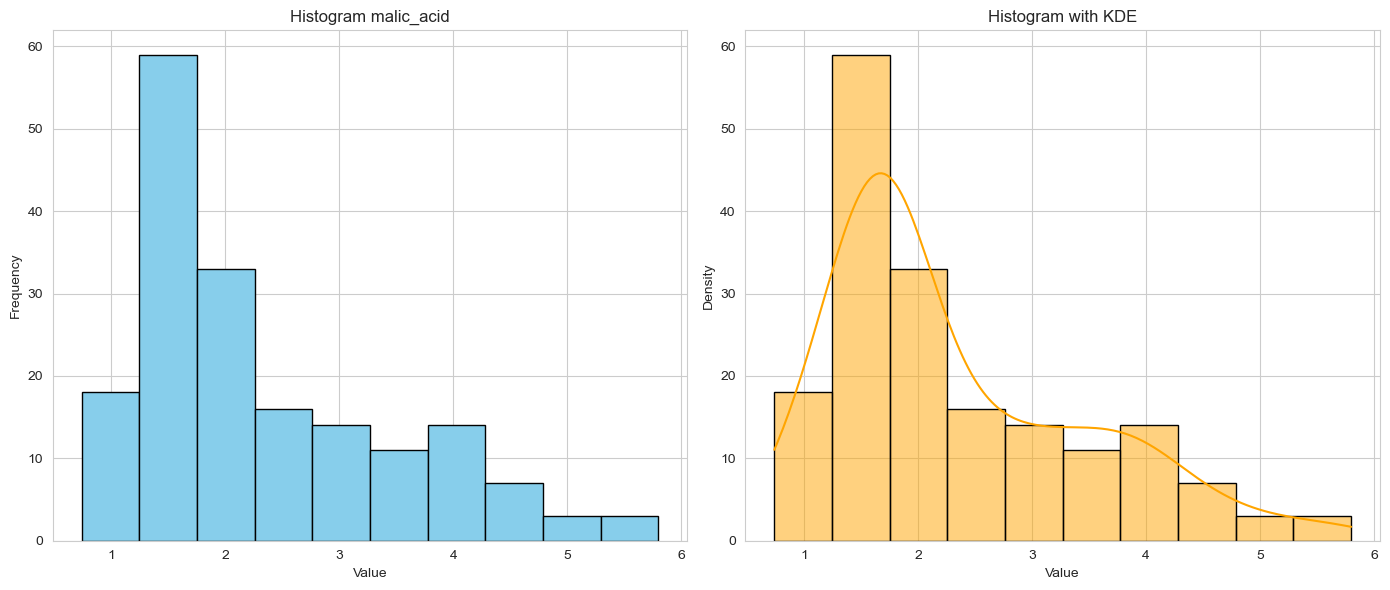

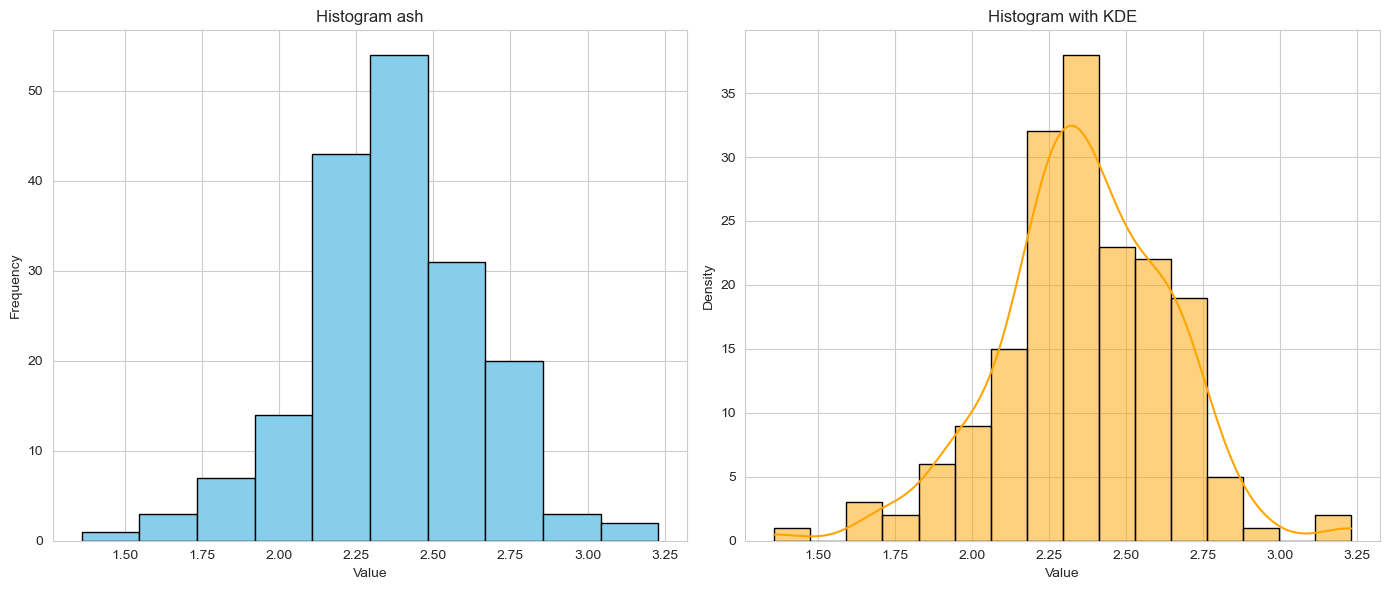

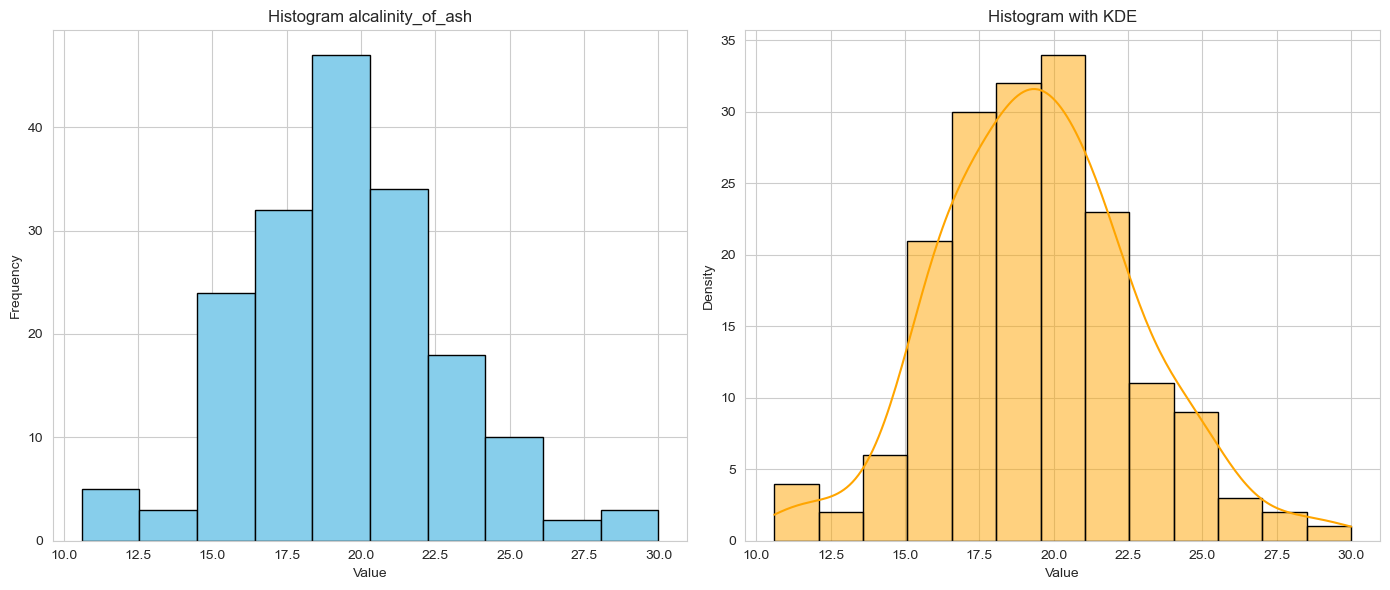

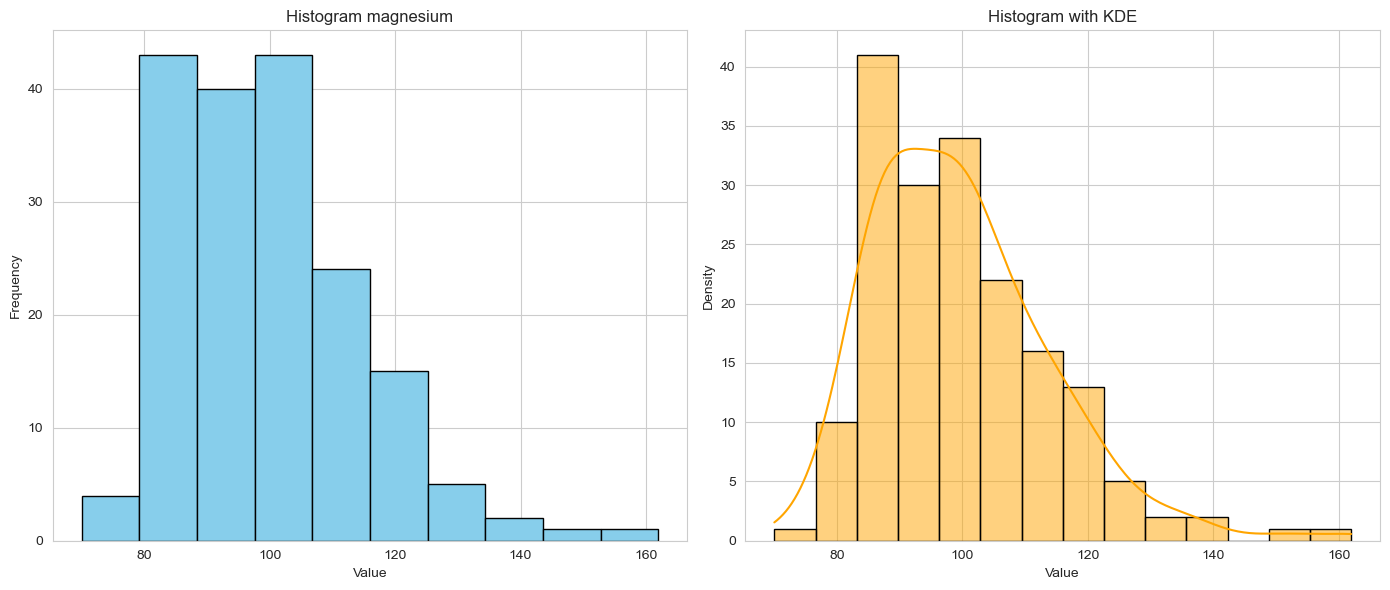

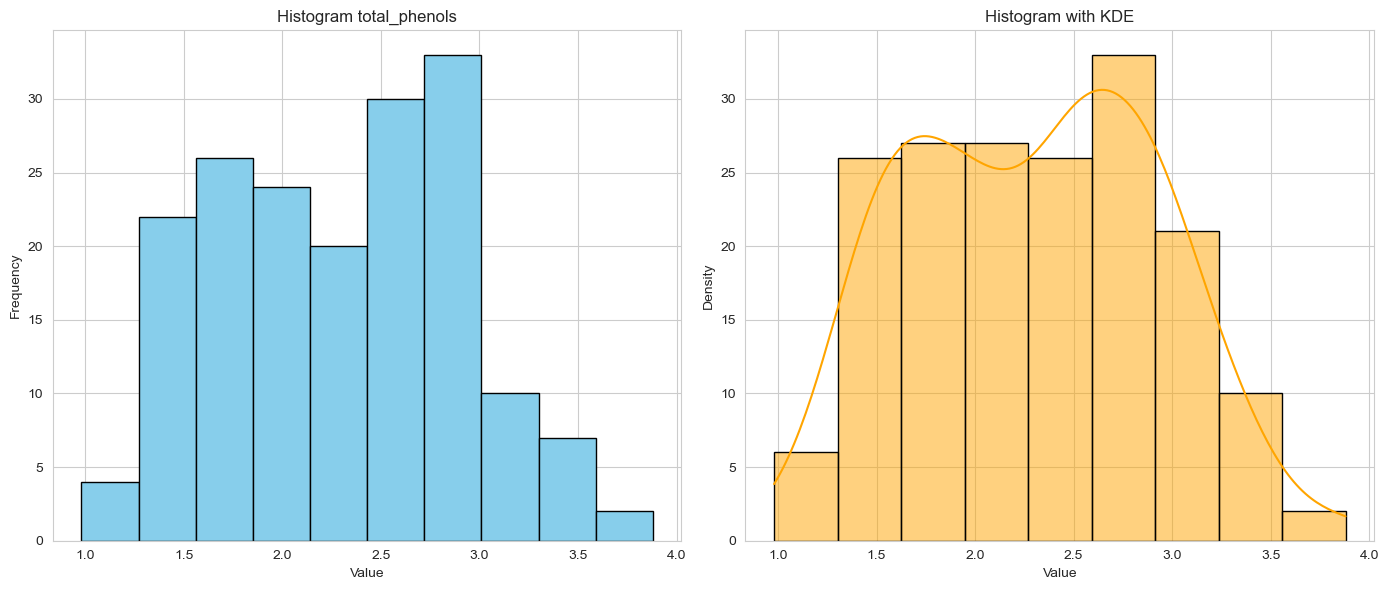

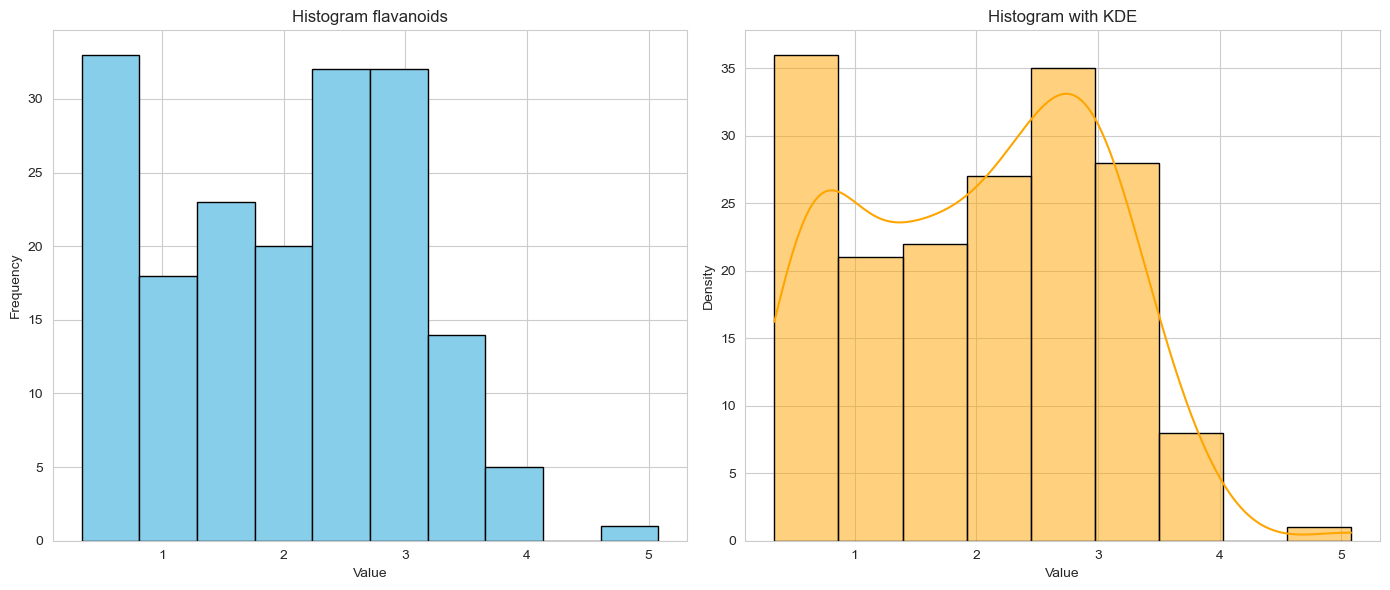

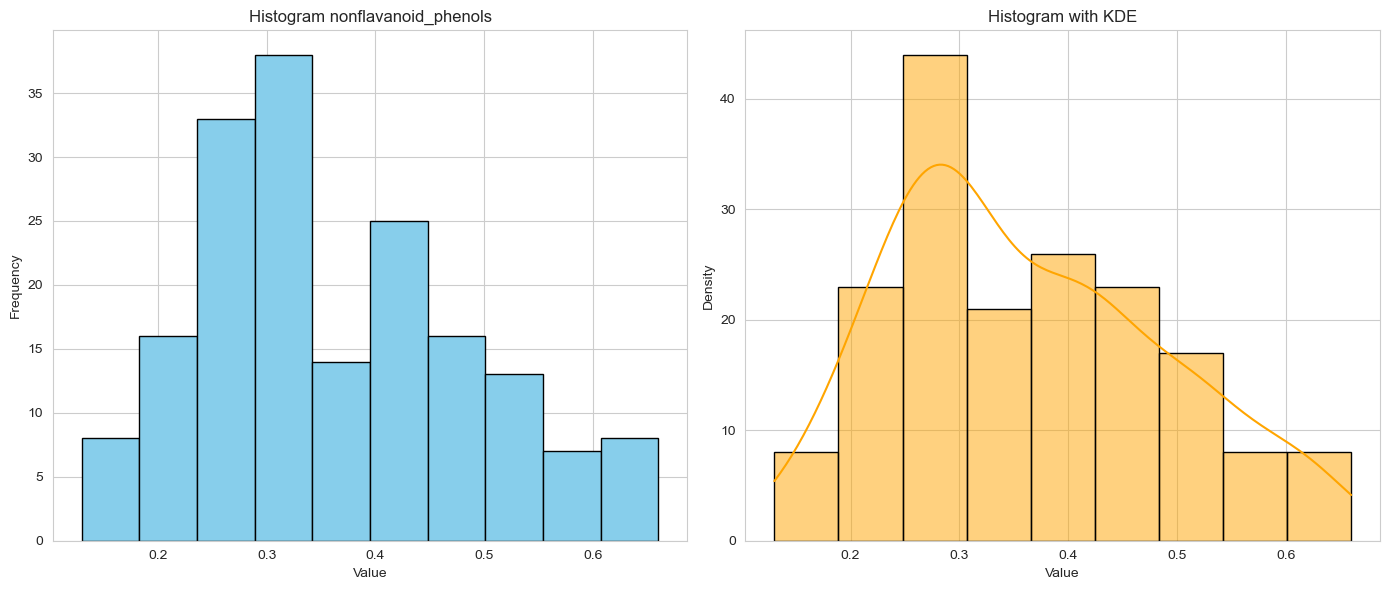

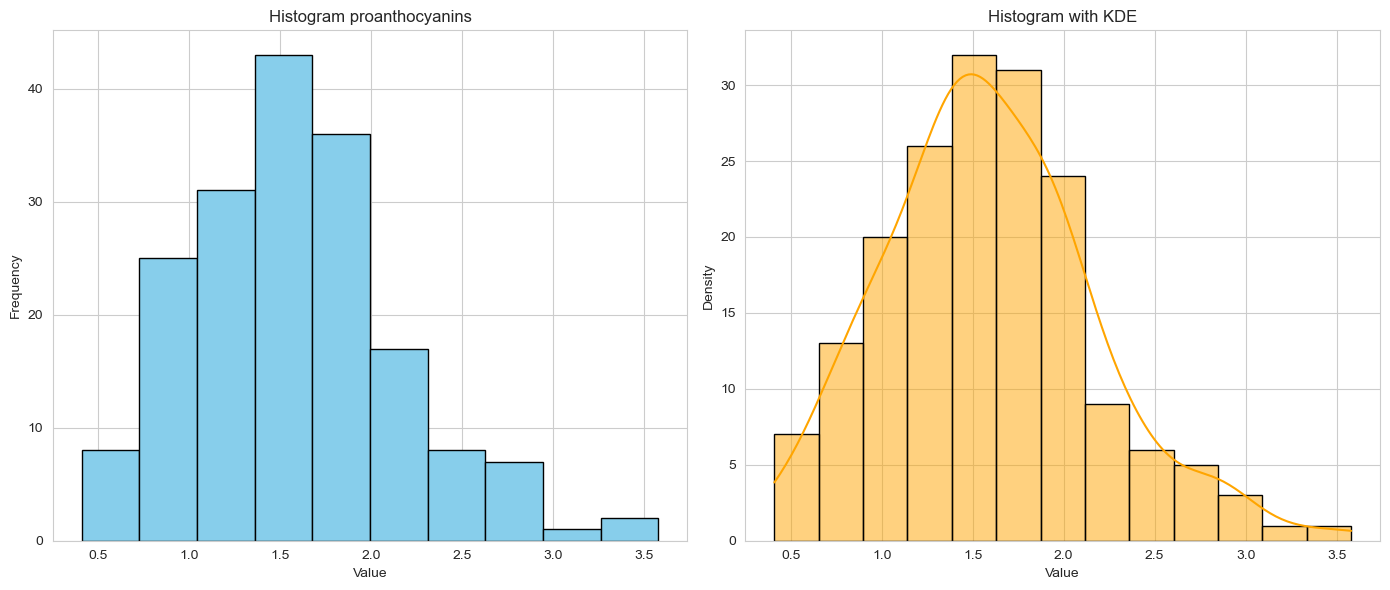

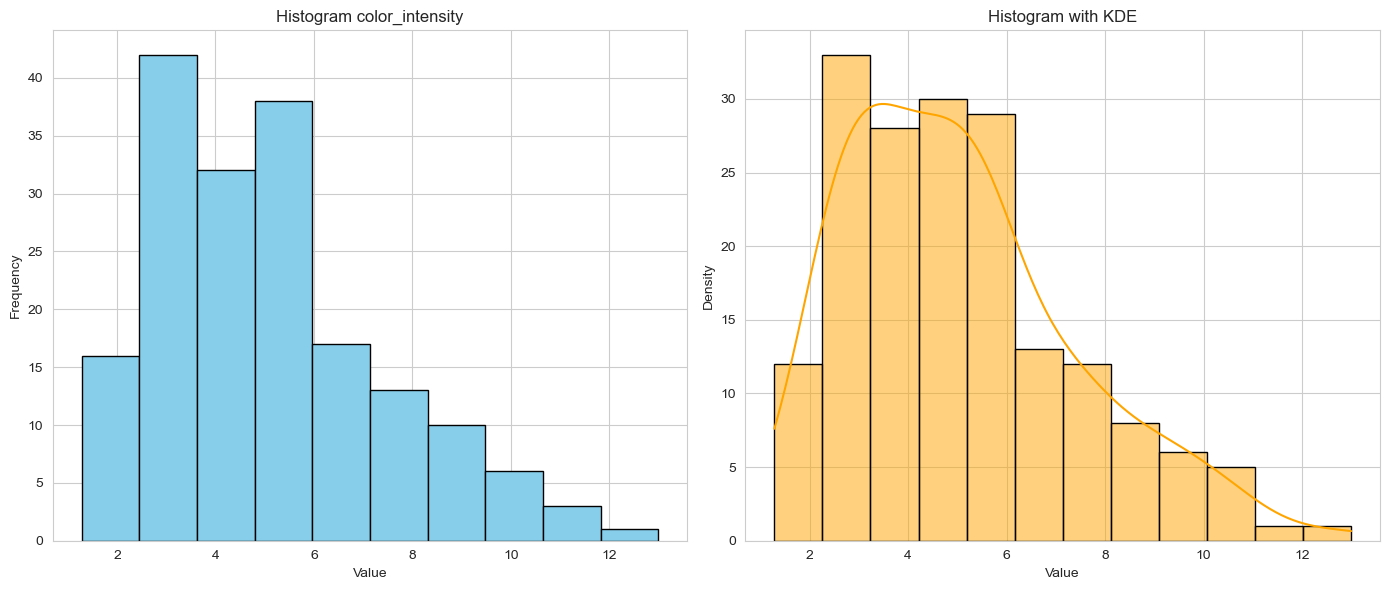

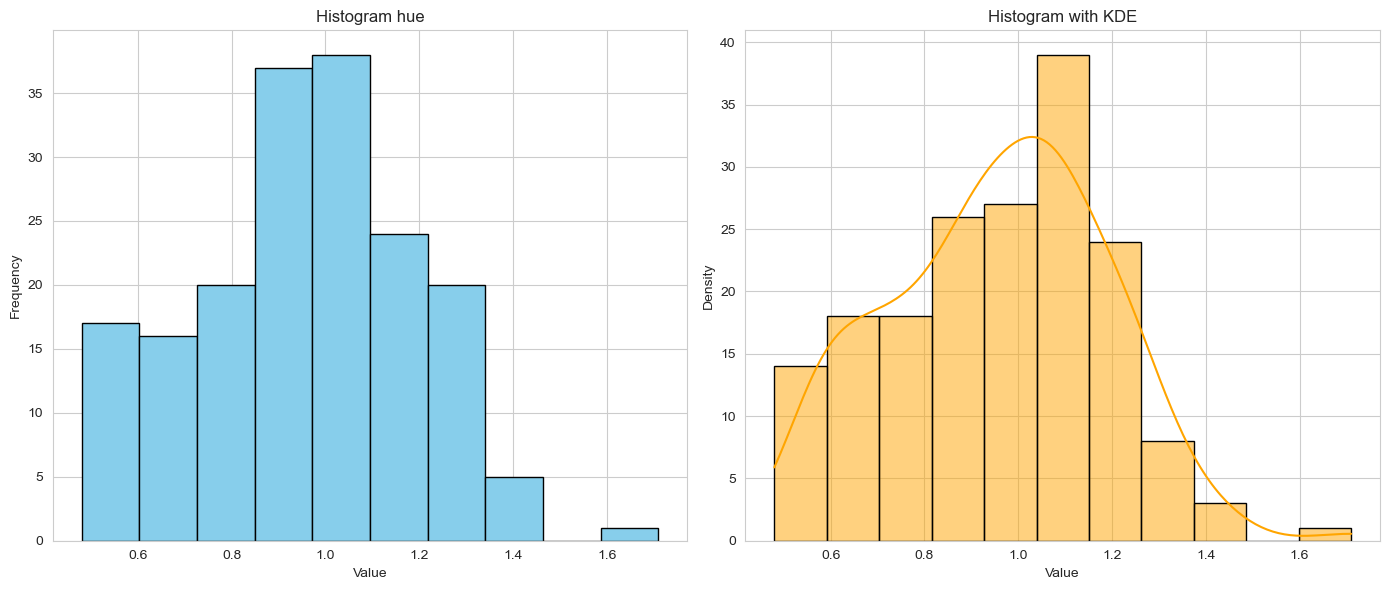

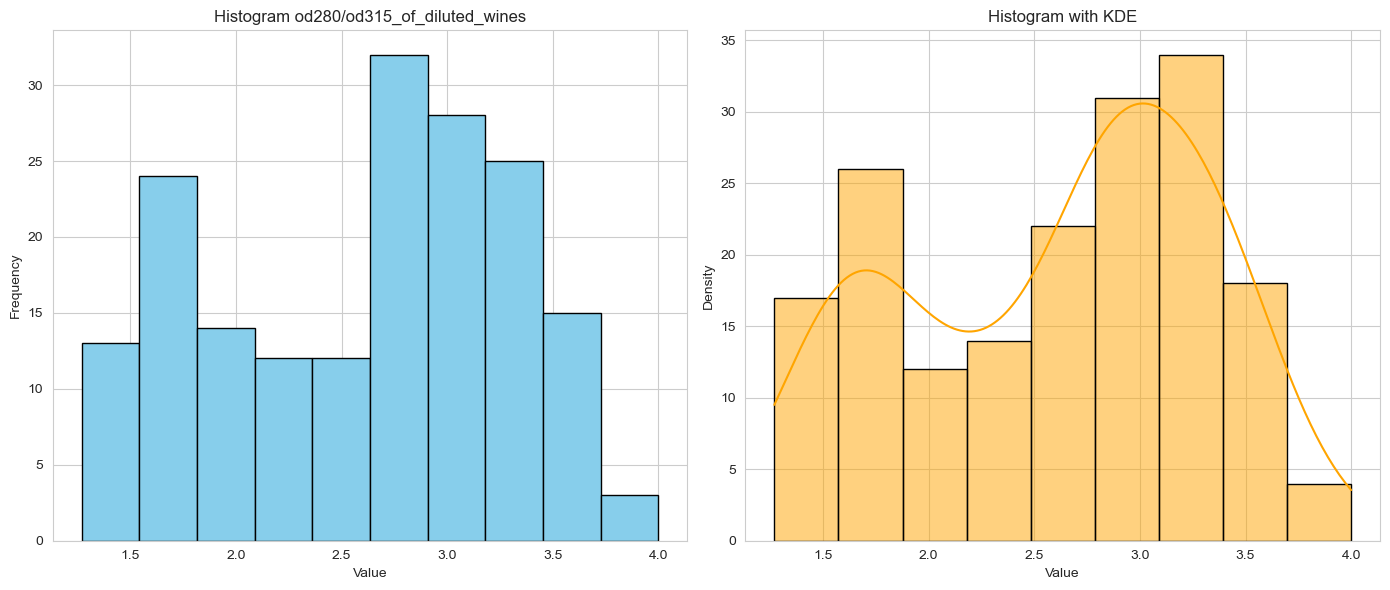

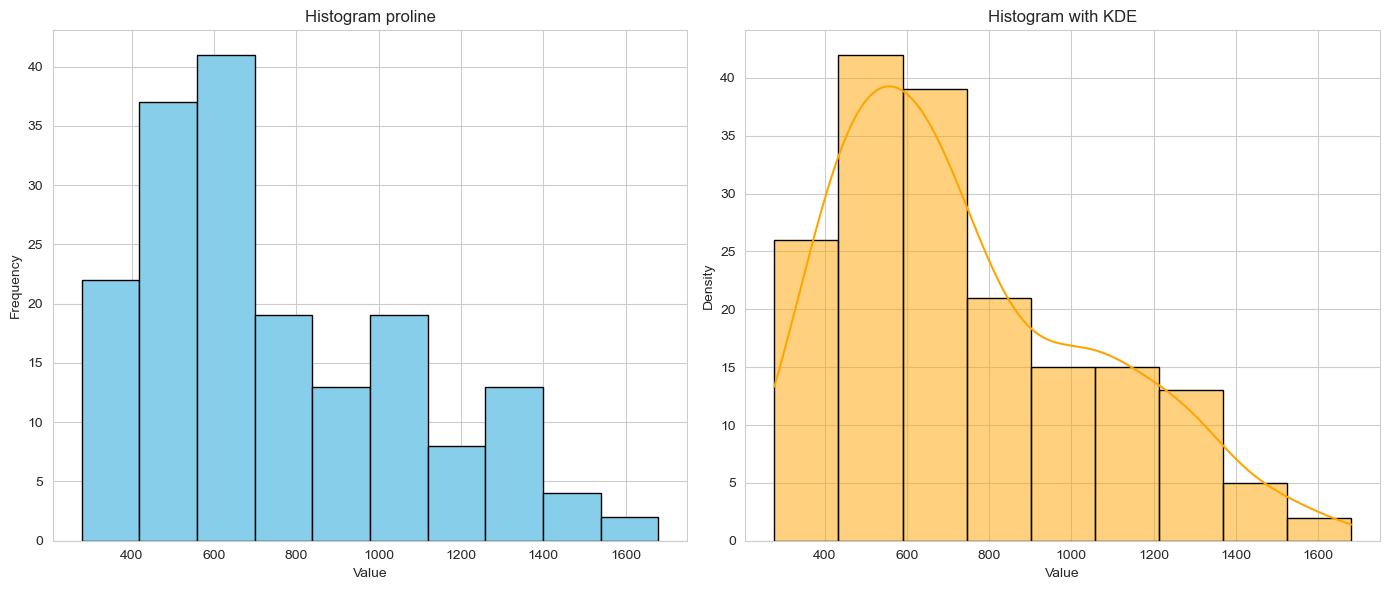

In [104]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(wine_df)

# 8. Numerical - Variables -Outliers Analysis - fillit

# 9. Bi Variate Analyis

## 9.1 cat to target(cat)

In [105]:
cat_vars = wine_df.select_dtypes(include="object").columns
print(cat_vars)

Index(['target'], dtype='object')


## 9.2 Num vs Num

In [106]:
num_cols1 = wine_df.select_dtypes(exclude="object").columns.to_list()
num_cols2 = num_cols1.copy()
num_cols2

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

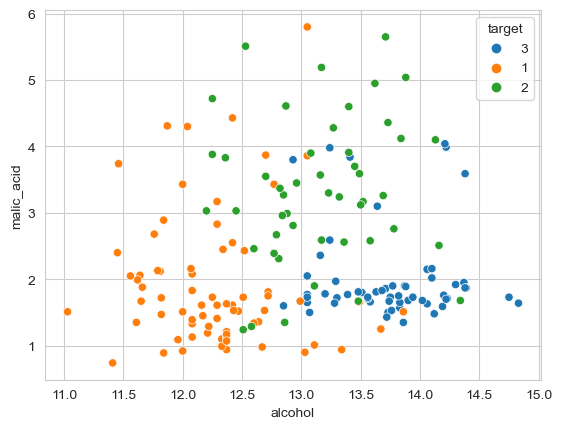

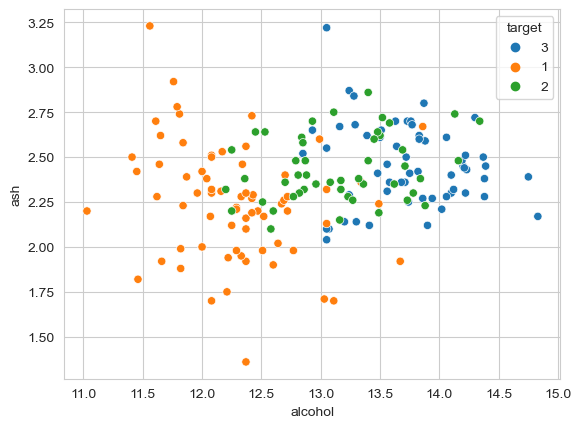

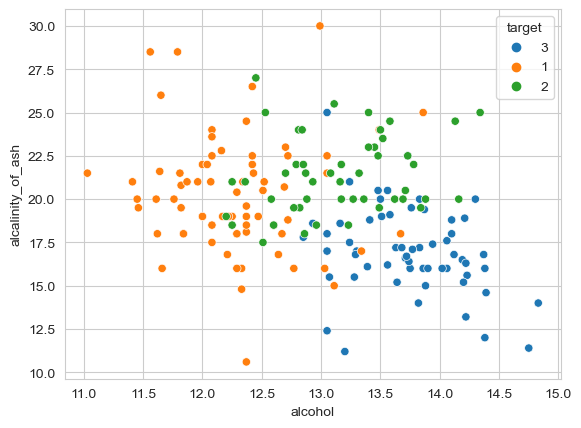

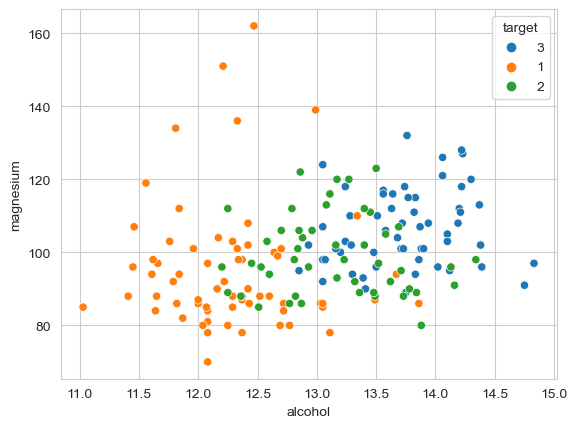

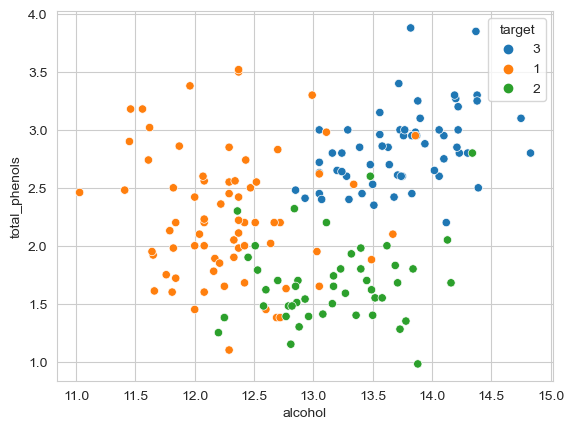

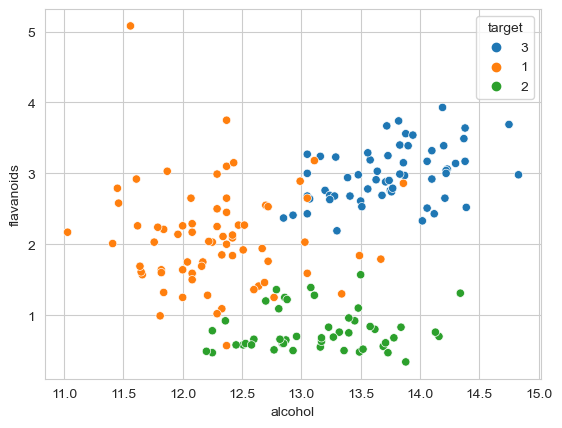

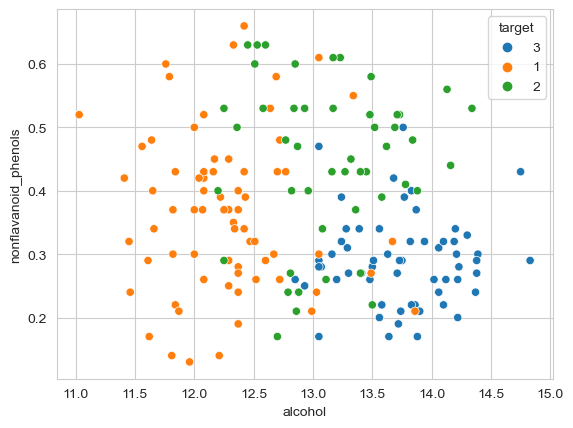

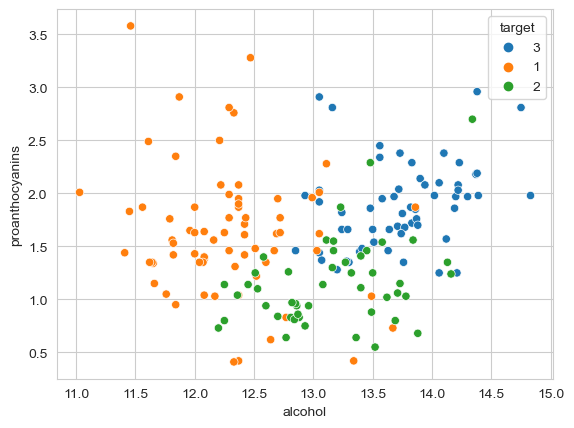

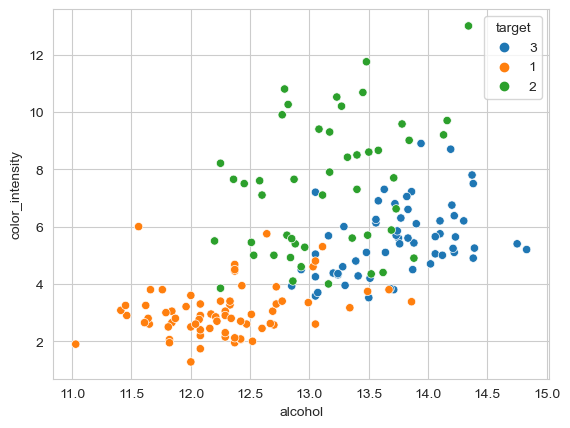

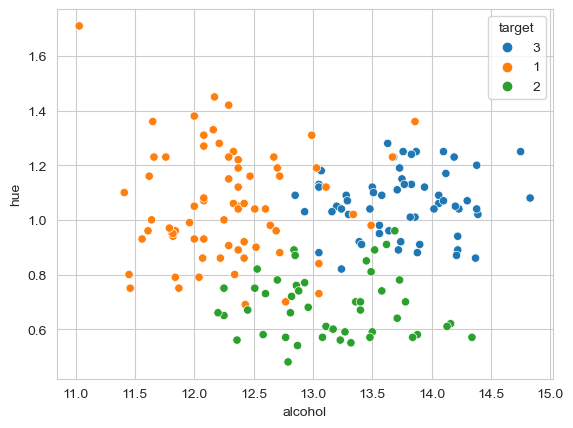

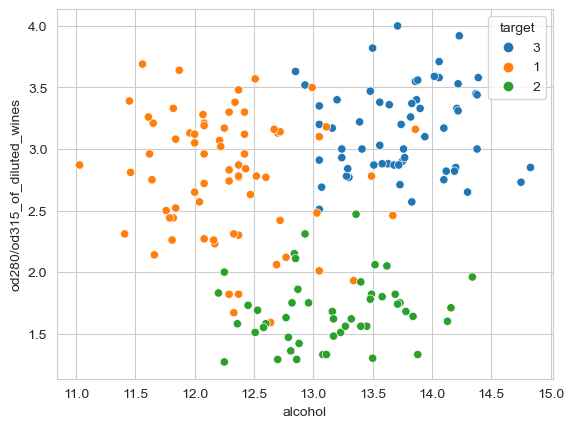

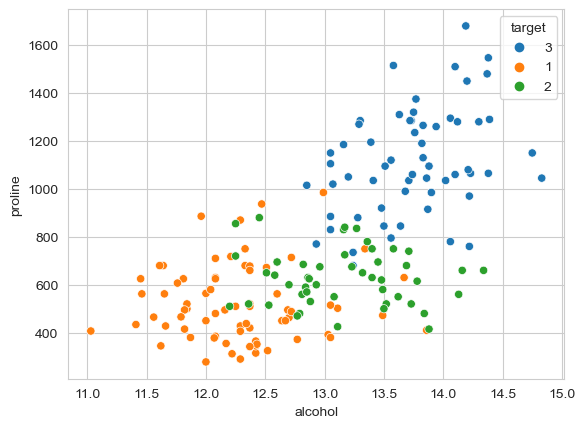

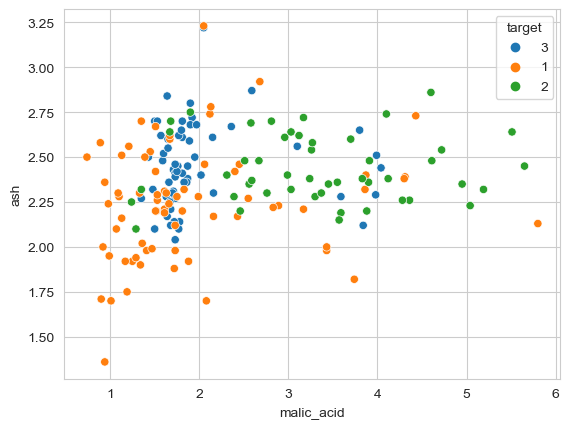

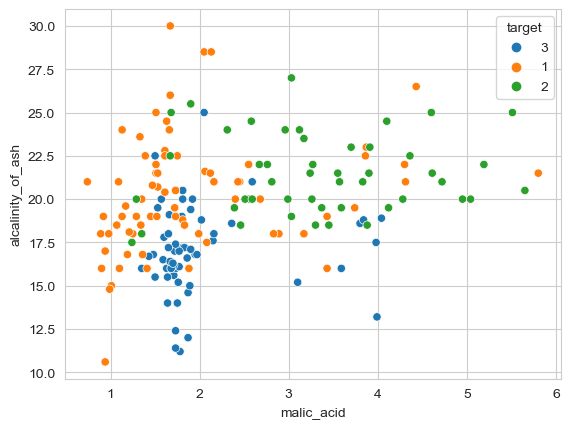

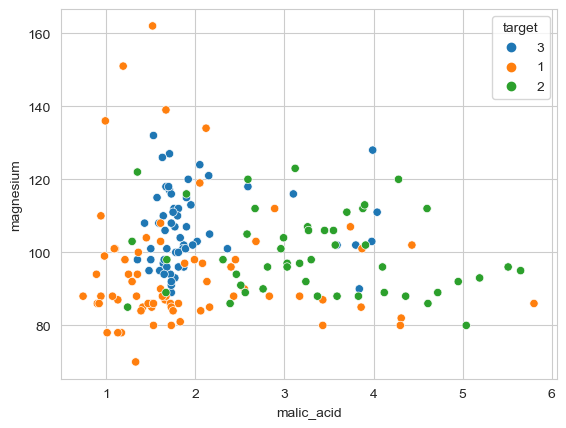

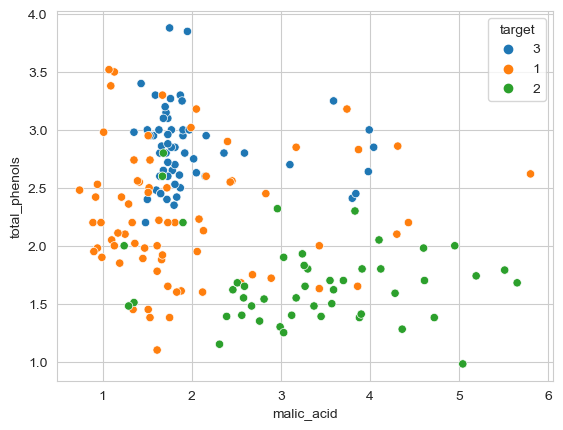

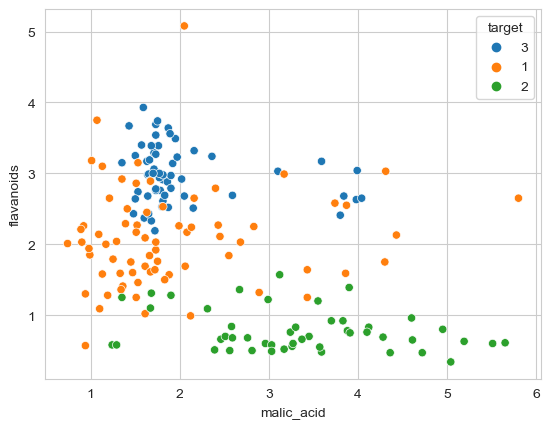

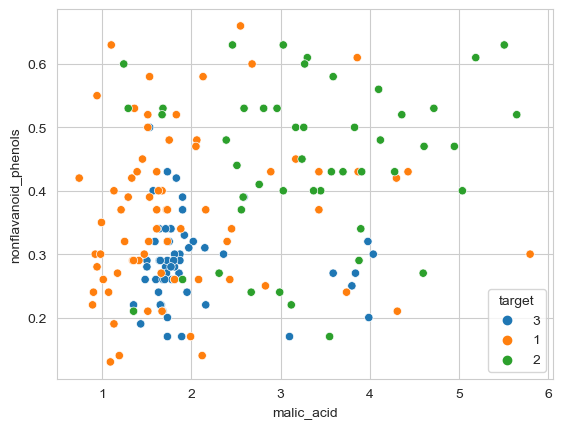

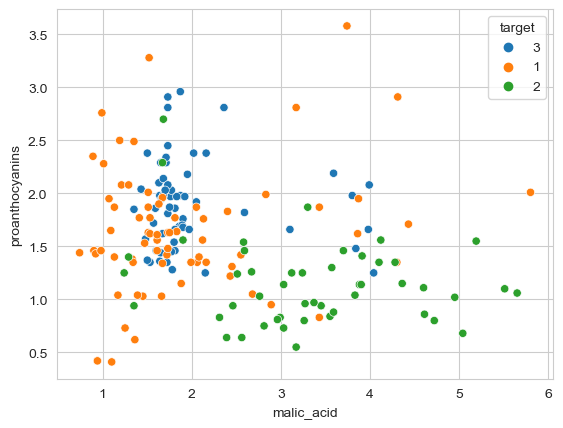

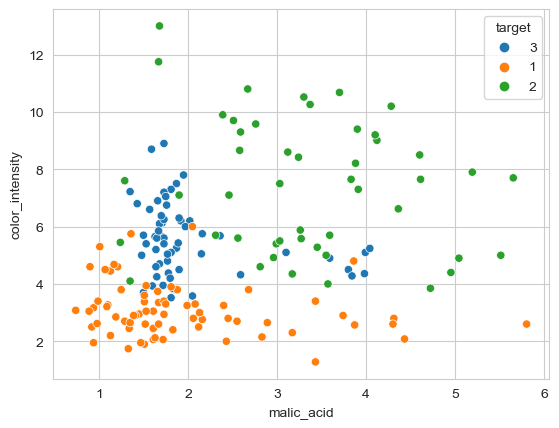

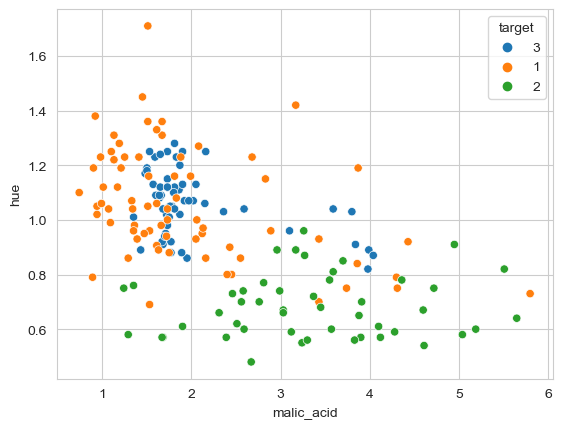

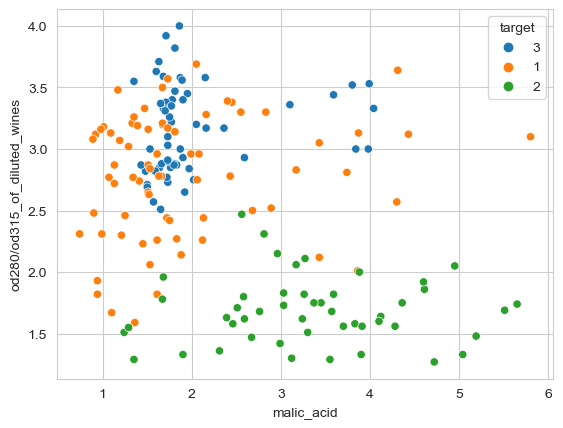

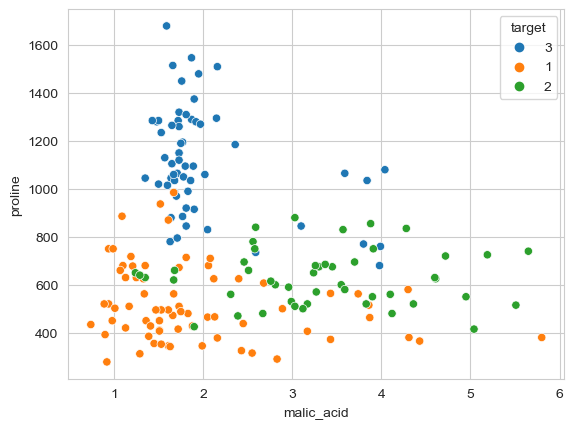

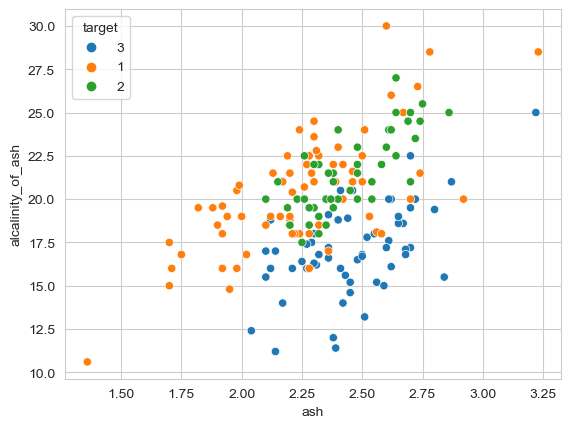

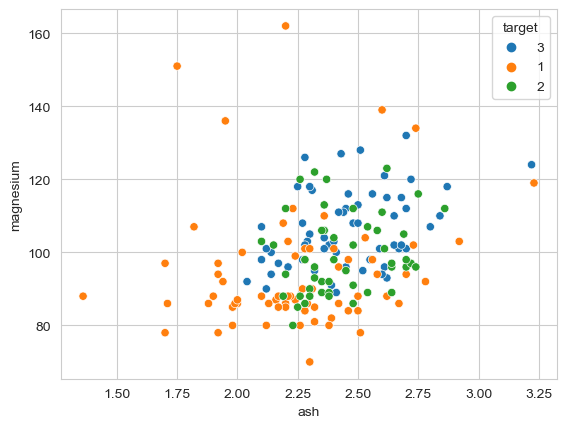

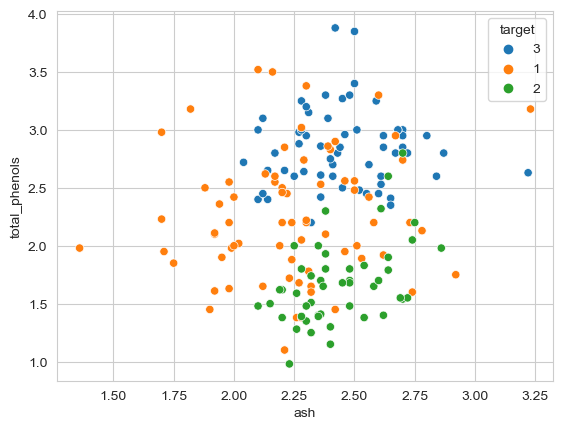

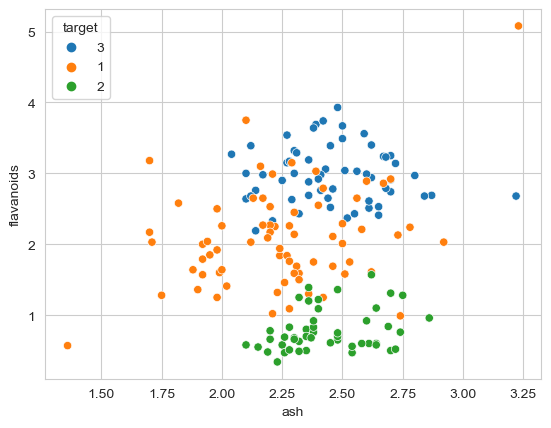

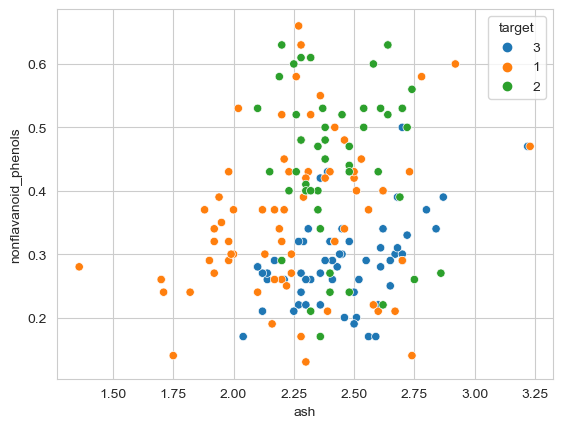

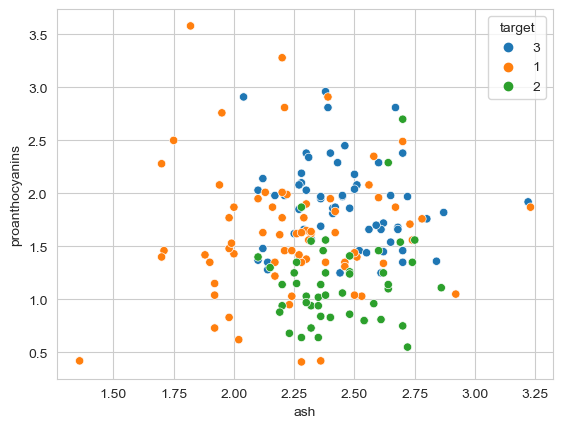

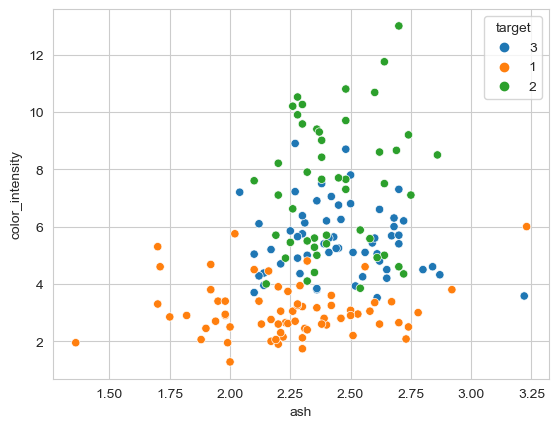

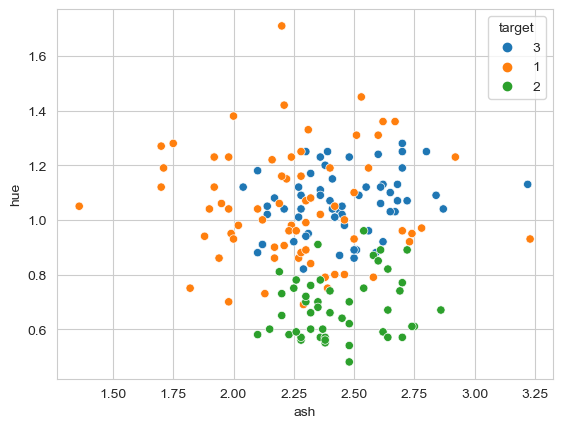

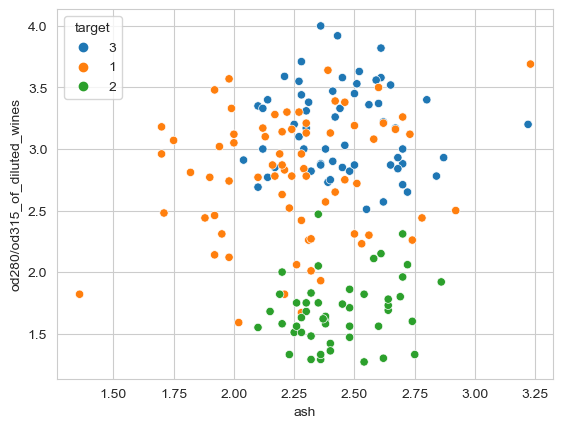

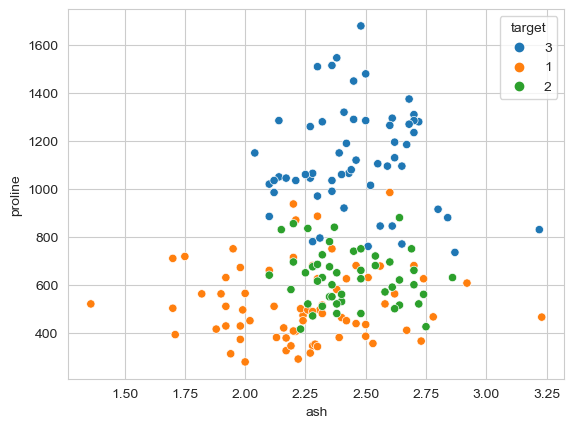

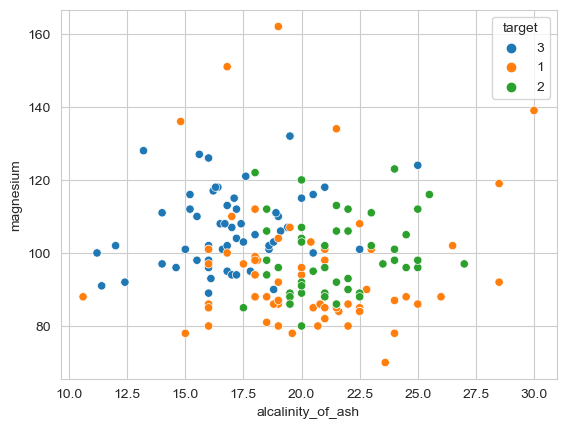

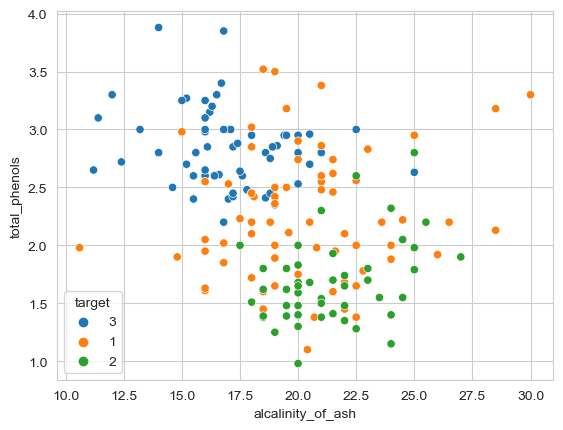

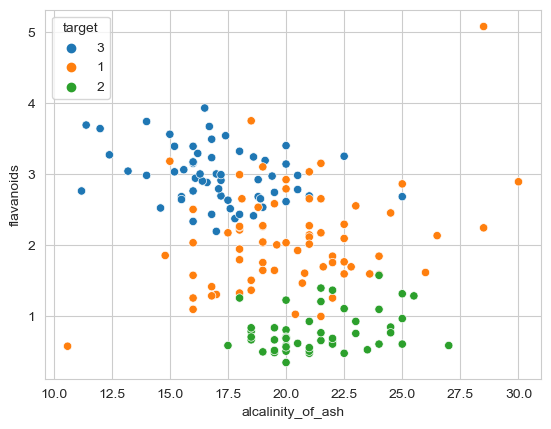

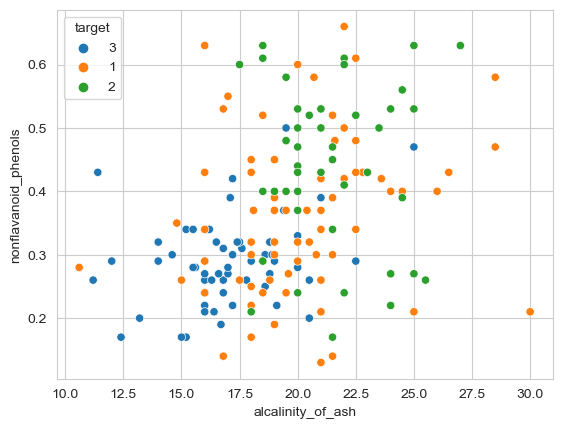

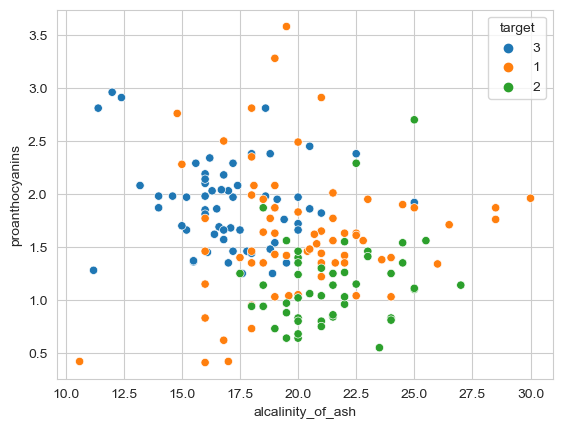

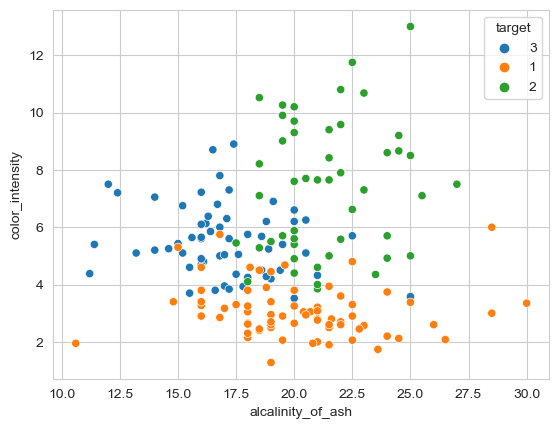

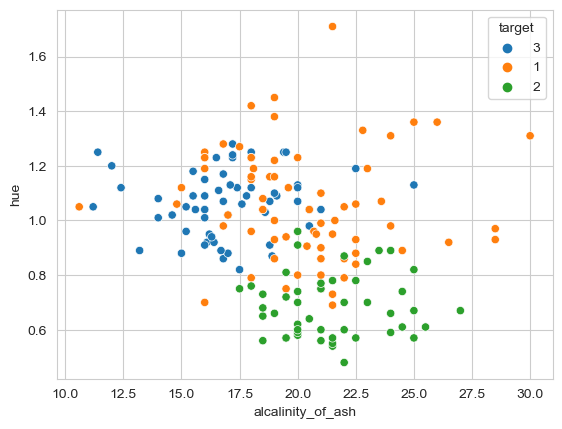

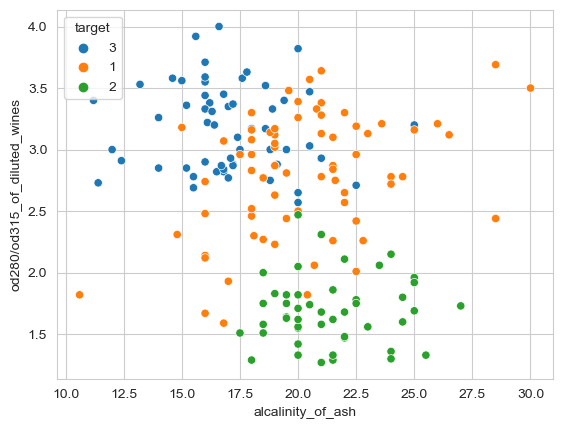

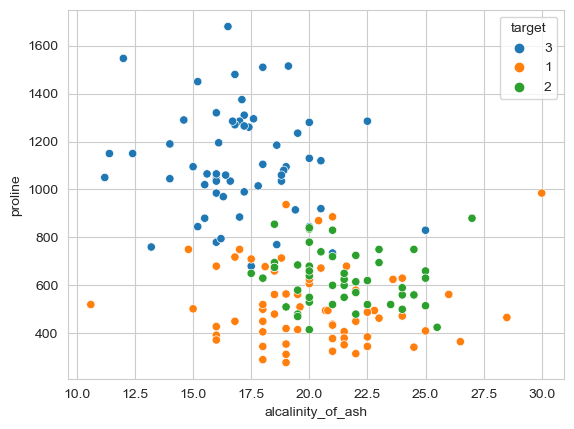

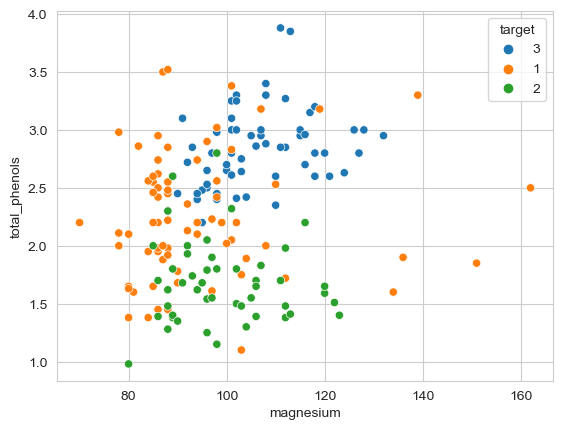

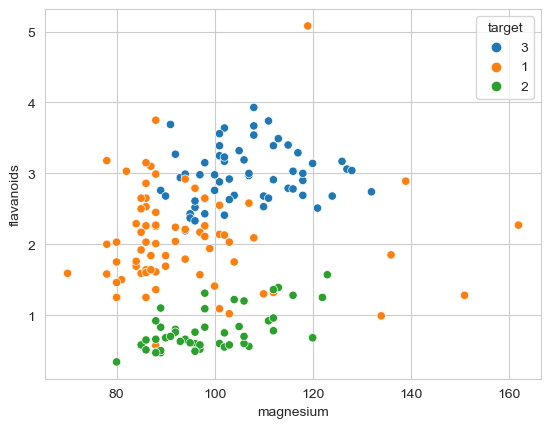

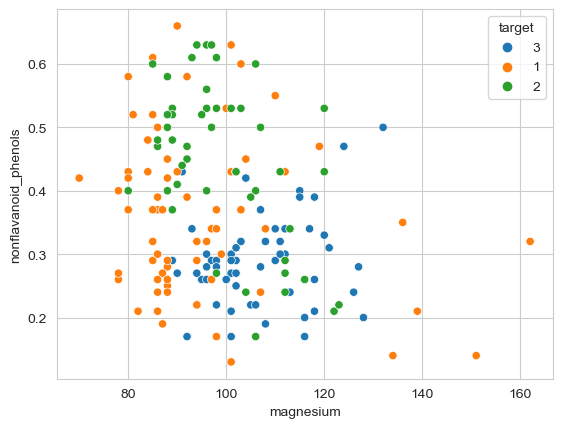

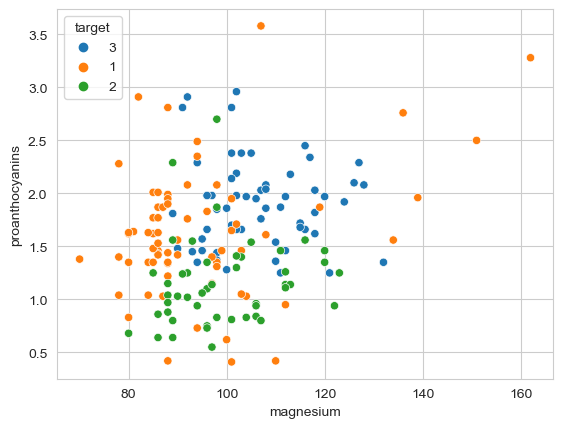

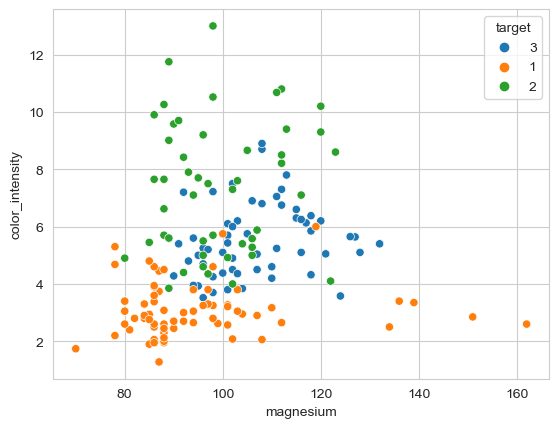

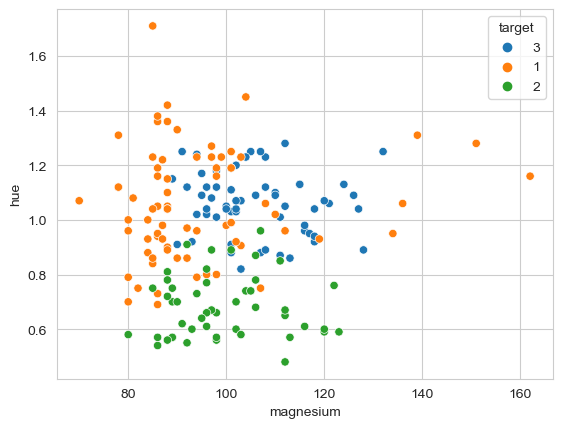

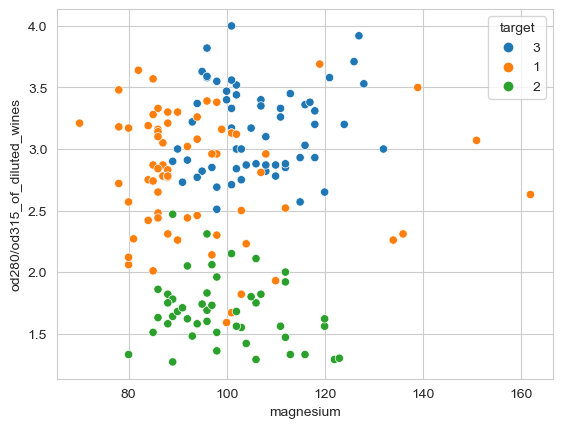

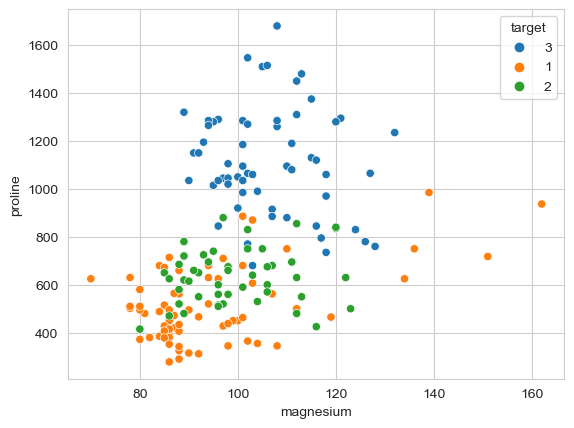

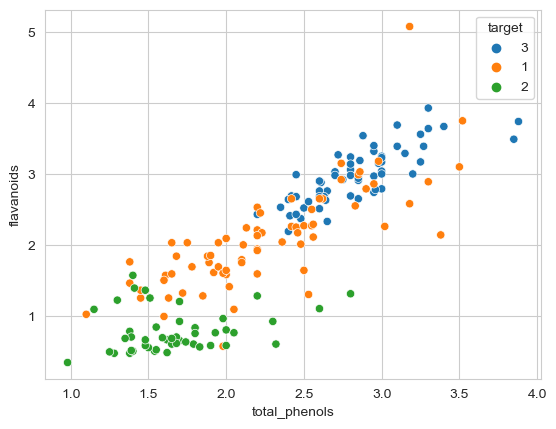

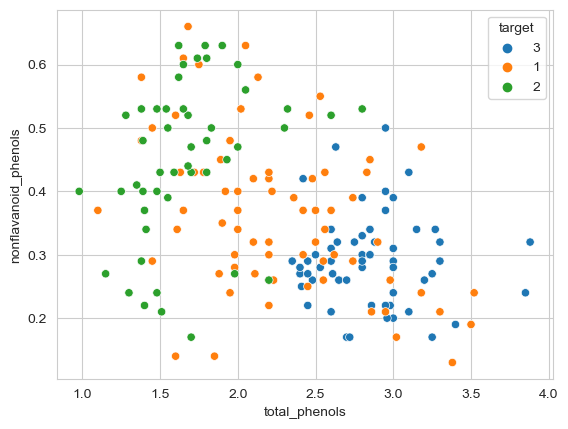

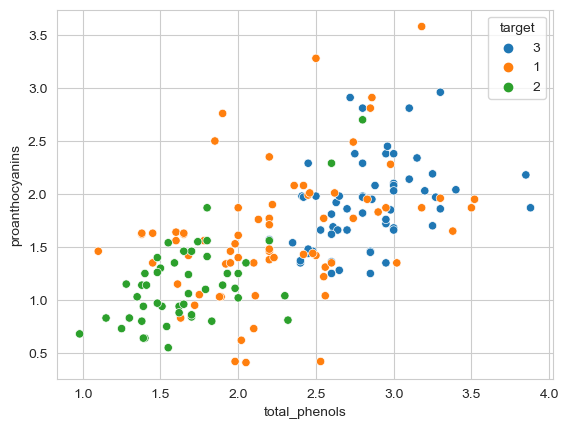

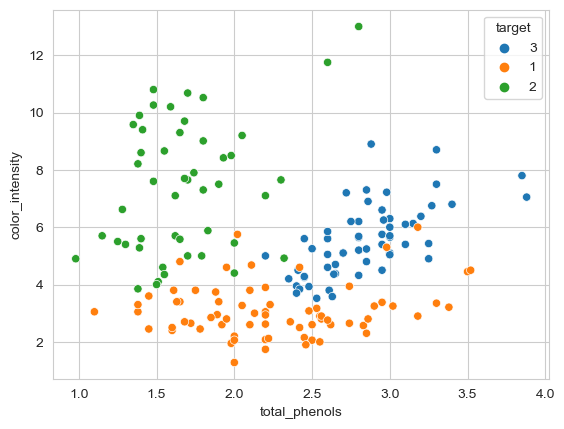

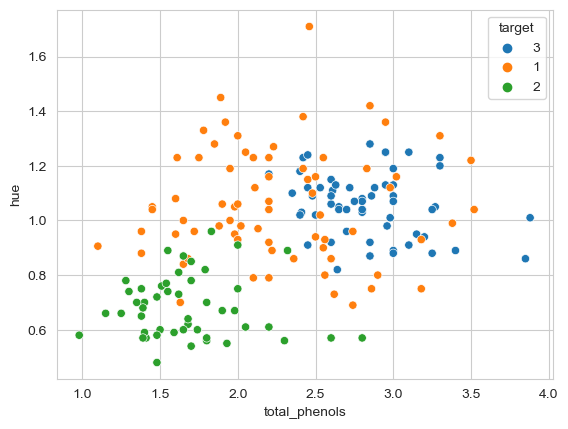

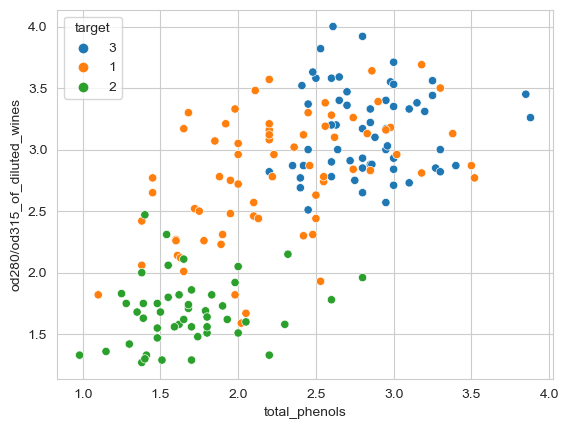

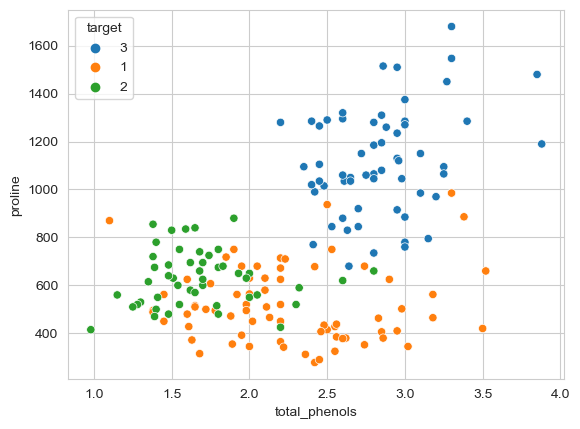

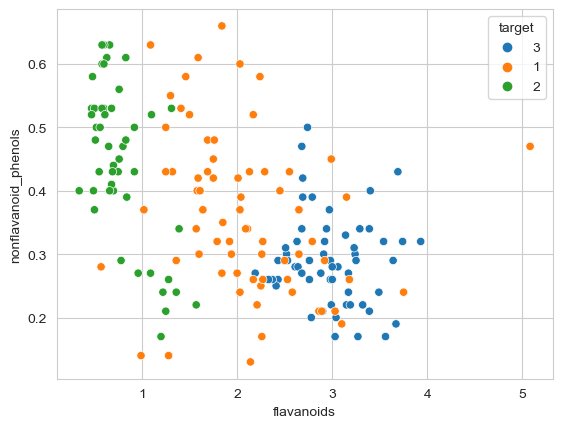

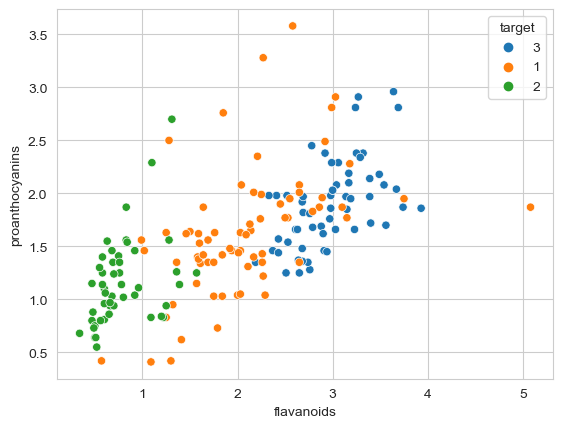

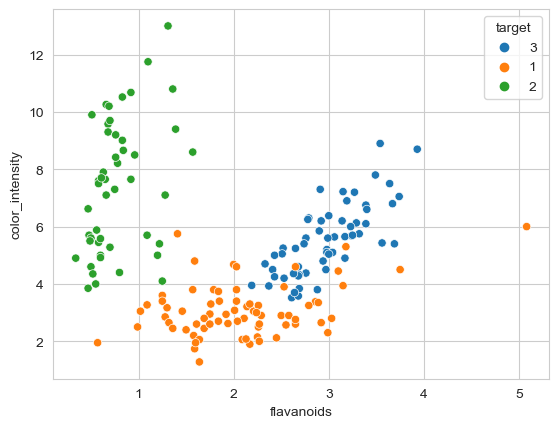

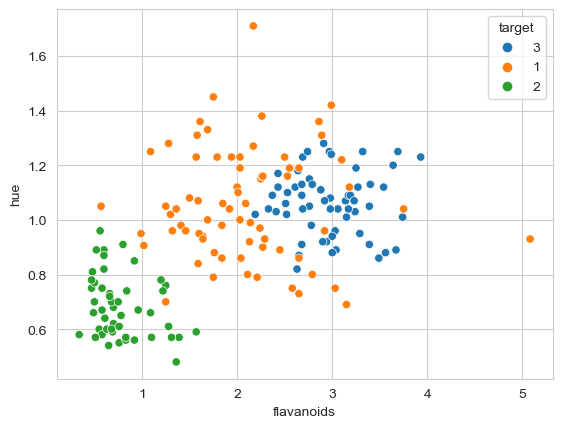

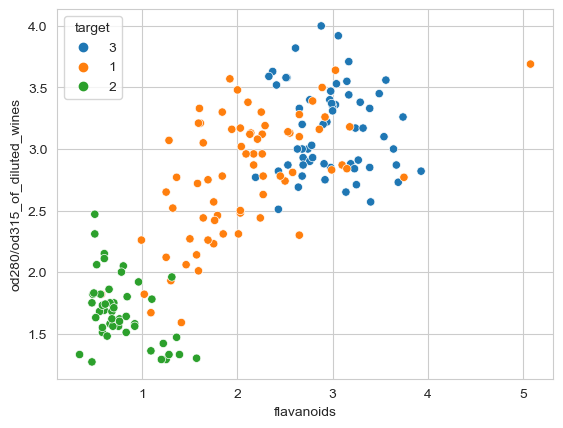

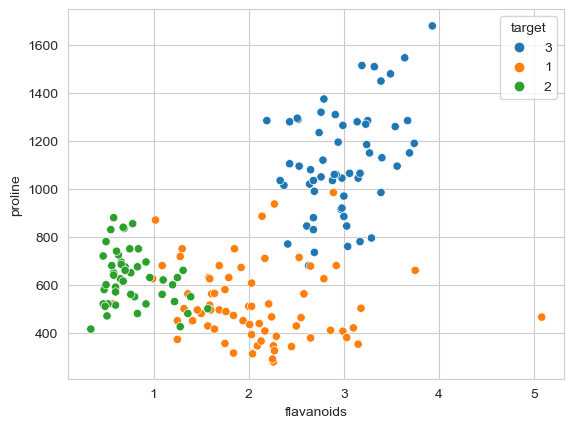

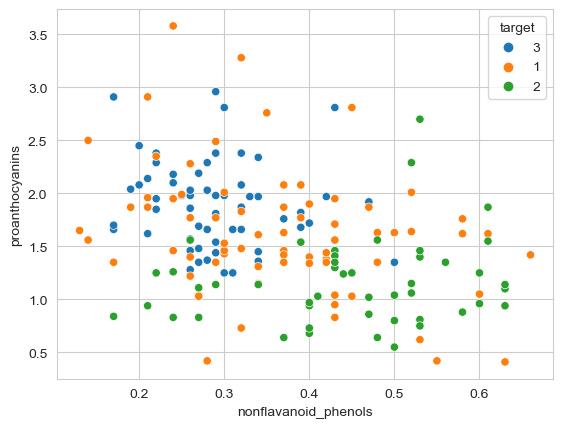

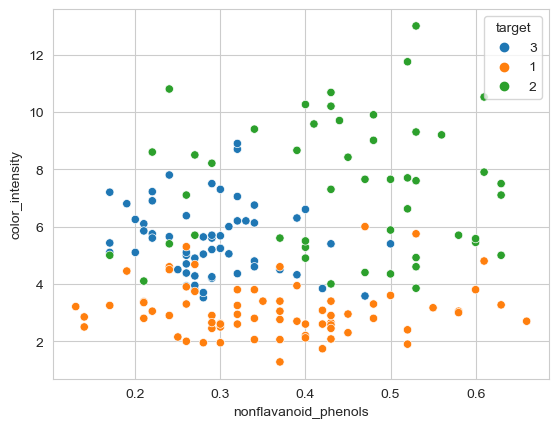

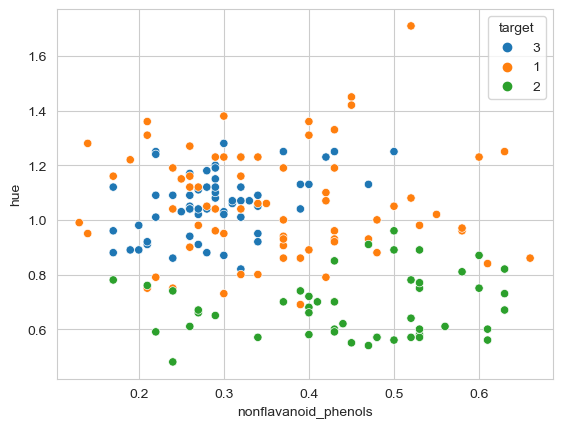

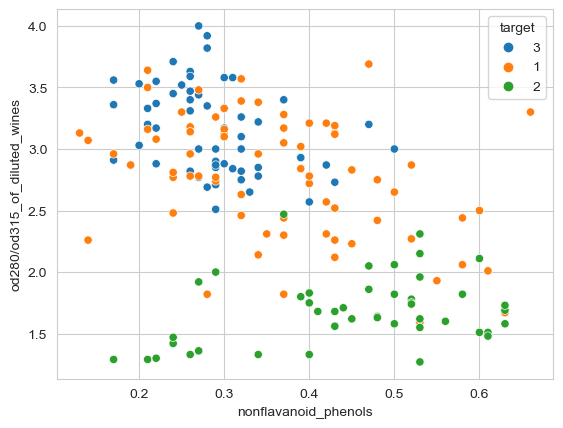

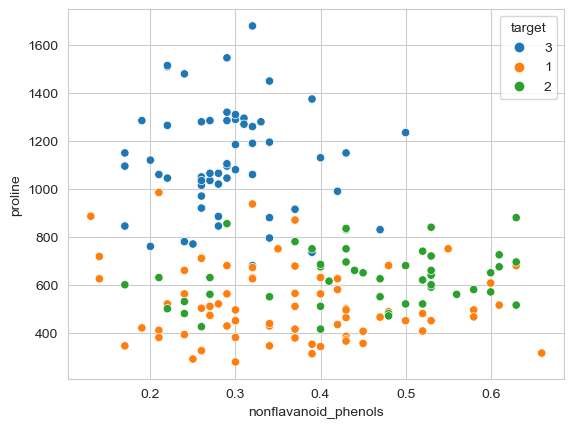

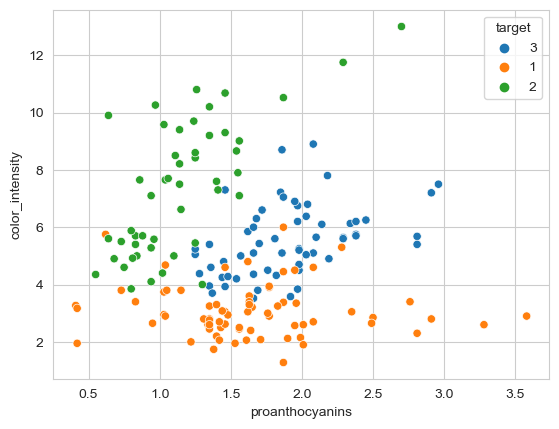

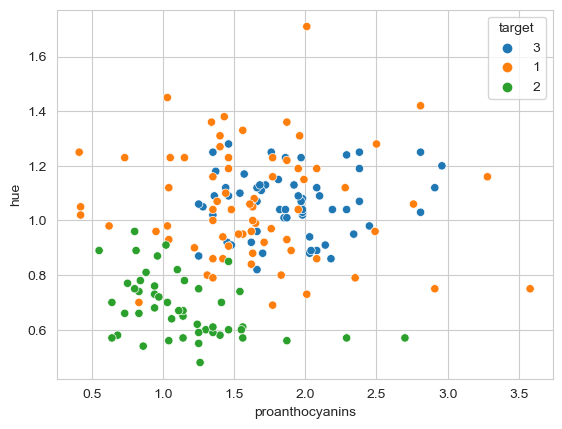

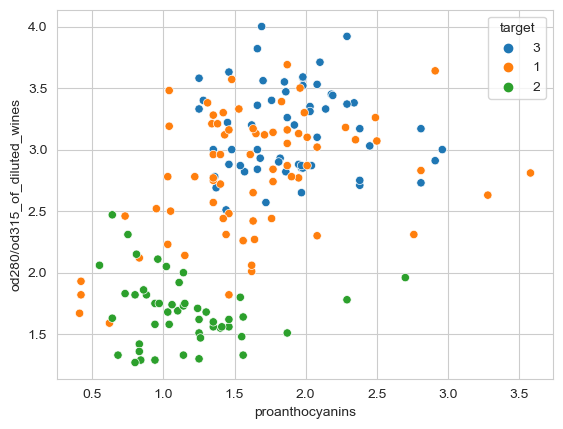

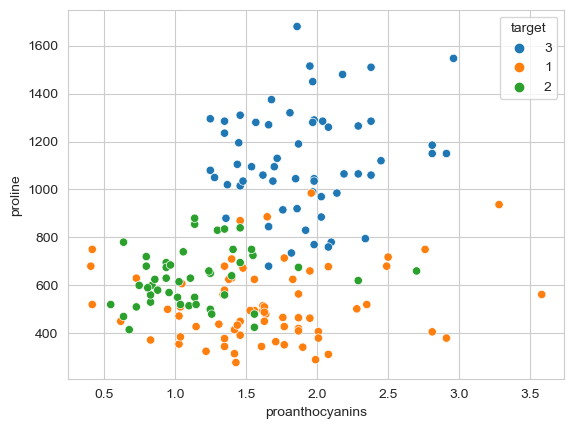

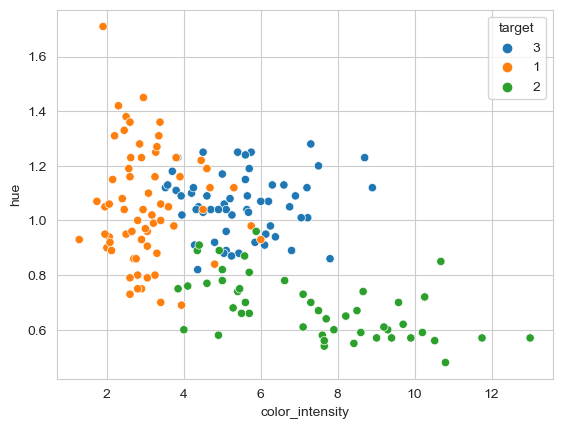

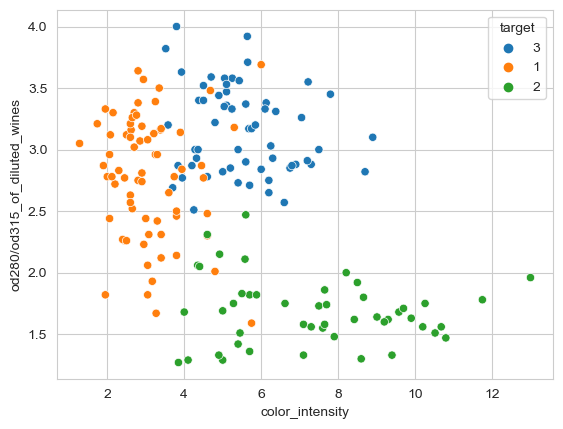

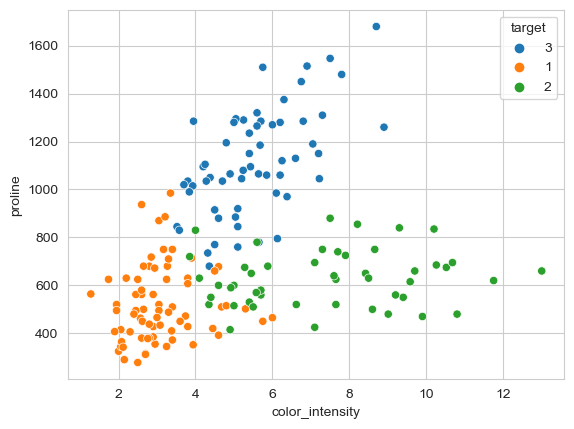

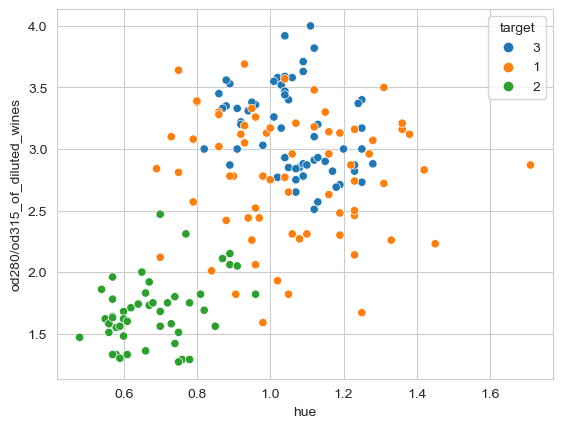

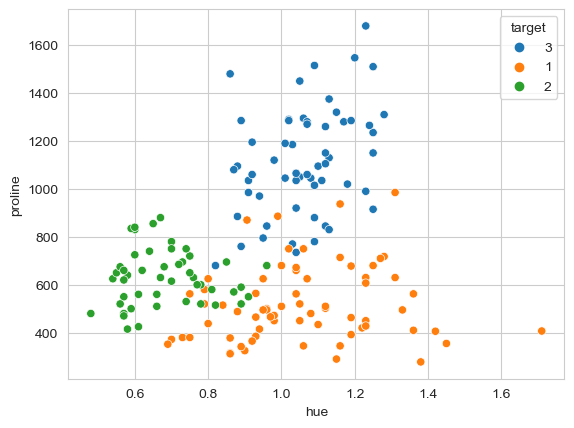

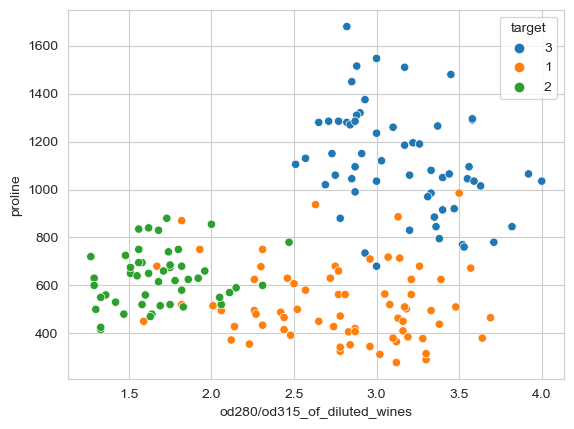

In [107]:
for i in num_cols1:
    for j in num_cols2:
        if i == j:
            pass
        else:
            sns.scatterplot(x=i,y=j,hue=target,data=wine_df)
            plt.show()
    num_cols2.pop(0)

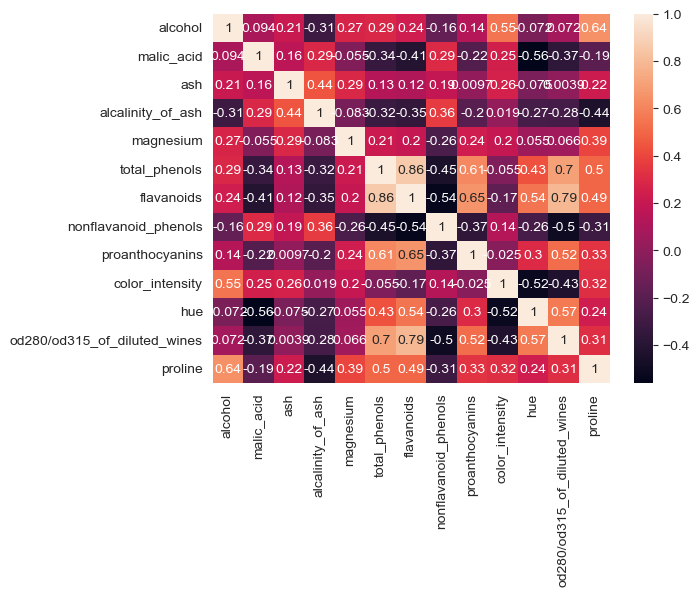

In [108]:
corr_mat=wine_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)
plt.show()

In [109]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

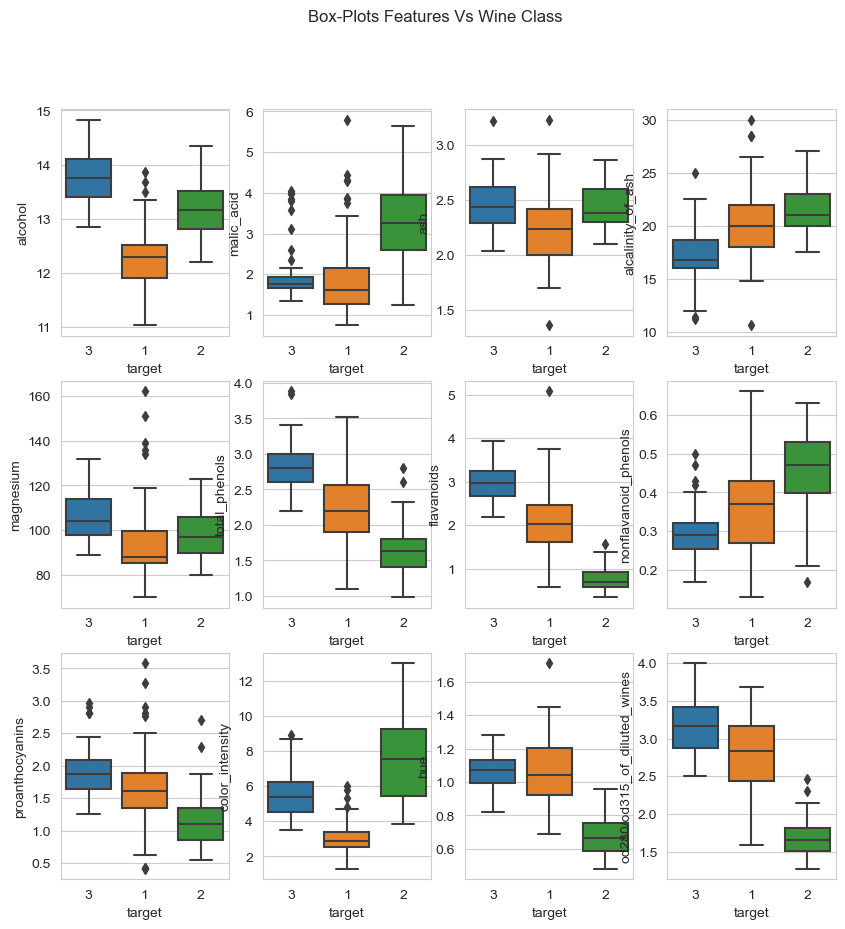

In [110]:
output_var='target'
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 4, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs Wine Class')
sns.boxplot(ax=axes[0, 0], x=output_var, y='alcohol', data=wine_df)
sns.boxplot(ax=axes[0, 1], x=output_var, y='malic_acid', data=wine_df)
sns.boxplot(ax=axes[0, 2], x=output_var, y='ash', data=wine_df)
sns.boxplot(ax=axes[0, 3], x=output_var, y='alcalinity_of_ash', data=wine_df)

sns.boxplot(ax=axes[1, 0], x=output_var, y='magnesium', data=wine_df)
sns.boxplot(ax=axes[1, 1], x=output_var, y='total_phenols', data=wine_df)
sns.boxplot(ax=axes[1, 2], x=output_var, y='flavanoids', data=wine_df)
sns.boxplot(ax=axes[1, 3], x=output_var, y='nonflavanoid_phenols', data=wine_df)

sns.boxplot(ax=axes[2, 0], x=output_var, y='proanthocyanins', data=wine_df)
sns.boxplot(ax=axes[2, 1], x=output_var, y='color_intensity', data=wine_df)
sns.boxplot(ax=axes[2, 2], x=output_var, y='hue', data=wine_df)
sns.boxplot(ax=axes[2, 3], x=output_var, y='od280/od315_of_diluted_wines', data=wine_df)
plt.show()


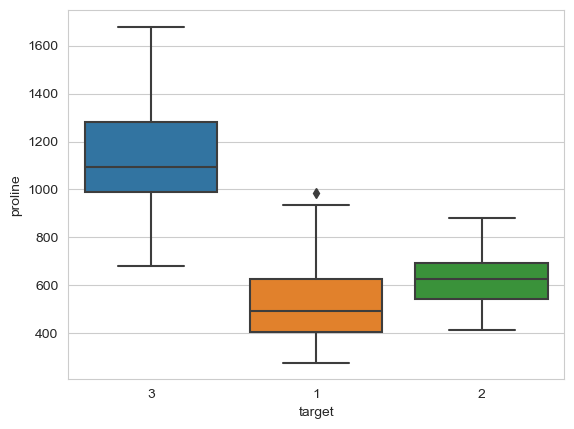

In [111]:
sns.boxplot(x=output_var, y='proline', data=wine_df)
plt.show()

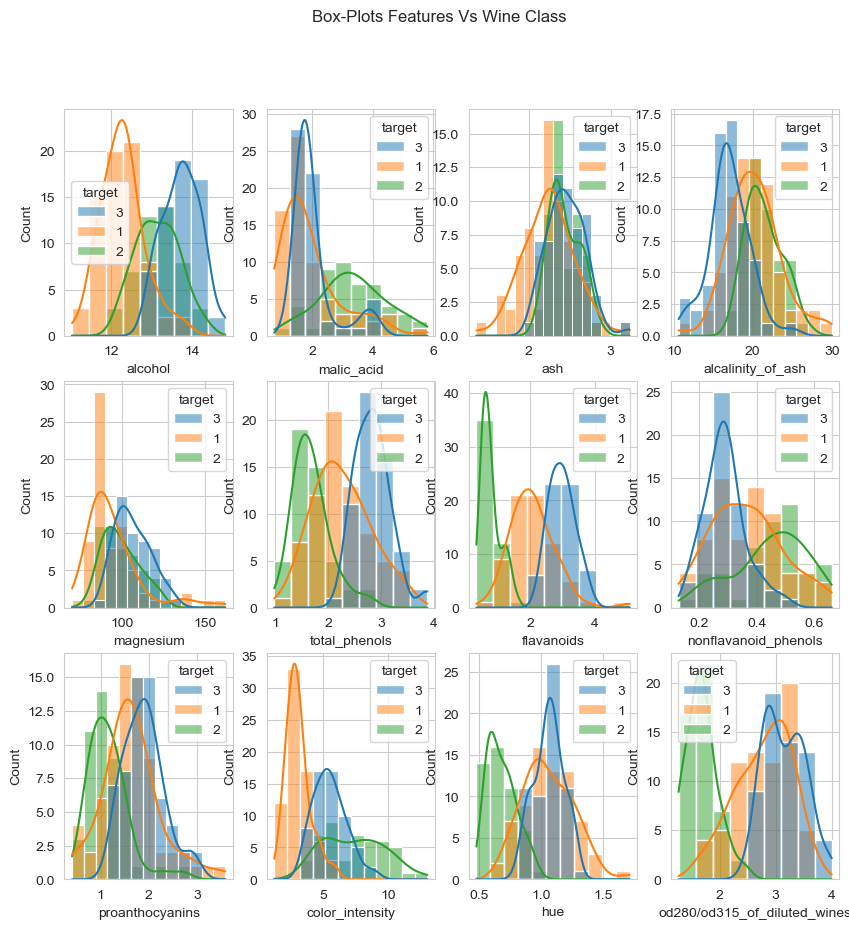

<Axes: xlabel='proline', ylabel='Count'>

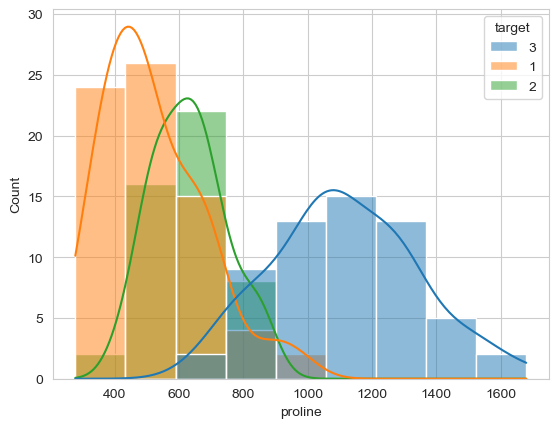

In [112]:
output_var='target'
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 4, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs Wine Class')
sns.histplot(ax=axes[0, 0], hue=output_var, x='alcohol', data=wine_df,kde=True)
sns.histplot(ax=axes[0, 1], hue=output_var, x='malic_acid', data=wine_df,kde=True)
sns.histplot(ax=axes[0, 2], hue=output_var, x='ash', data=wine_df,kde=True)
sns.histplot(ax=axes[0, 3], hue=output_var, x='alcalinity_of_ash', data=wine_df,kde=True)

sns.histplot(ax=axes[1, 0], hue=output_var, x='magnesium', data=wine_df,kde=True)
sns.histplot(ax=axes[1, 1], hue=output_var, x='total_phenols', data=wine_df,kde=True)
sns.histplot(ax=axes[1, 2], hue=output_var, x='flavanoids', data=wine_df,kde=True)
sns.histplot(ax=axes[1, 3], hue=output_var, x='nonflavanoid_phenols', data=wine_df,kde=True)

sns.histplot(ax=axes[2, 0], hue=output_var, x='proanthocyanins', data=wine_df,kde=True)
sns.histplot(ax=axes[2, 1], hue=output_var, x='color_intensity', data=wine_df,kde=True)
sns.histplot(ax=axes[2, 2], hue=output_var, x='hue', data=wine_df,kde=True)
sns.histplot(ax=axes[2, 3], hue=output_var, x='od280/od315_of_diluted_wines', data=wine_df,kde=True)
plt.show()
sns.histplot( hue=output_var, x='proline', data=wine_df,kde=True)

In [113]:
num_cols1 = wine_df.select_dtypes(exclude="object").columns.to_list()
num_cols2 = num_cols1.copy()
num_cols2

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

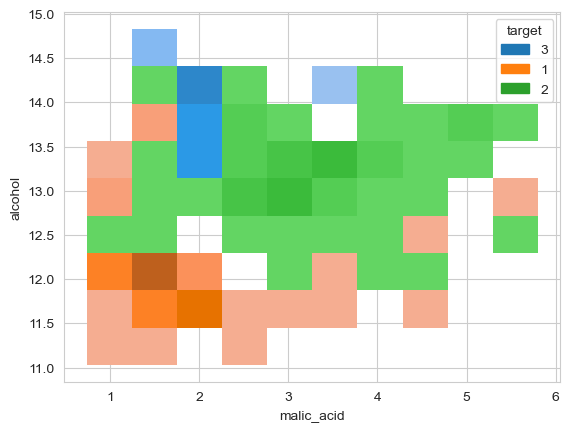

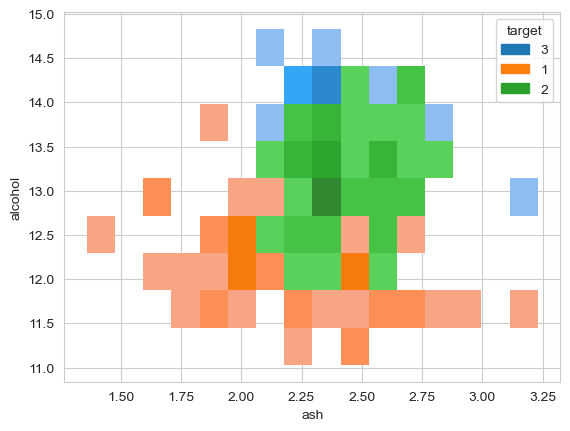

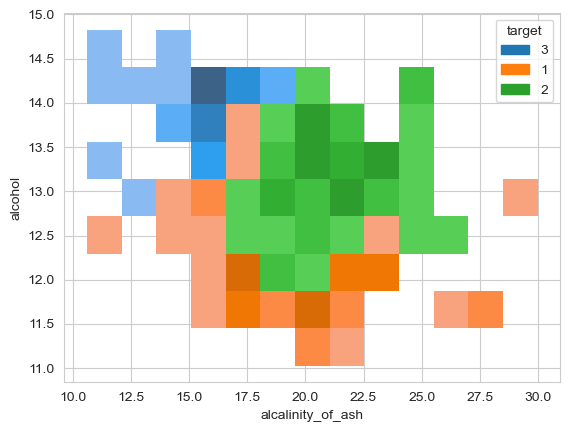

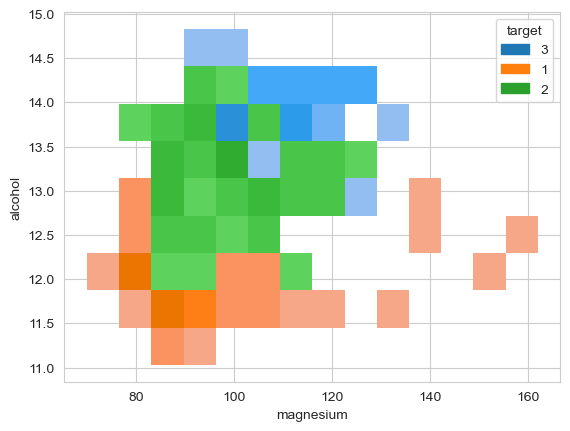

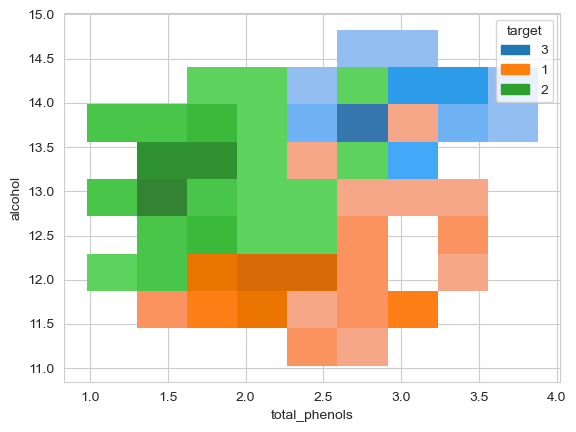

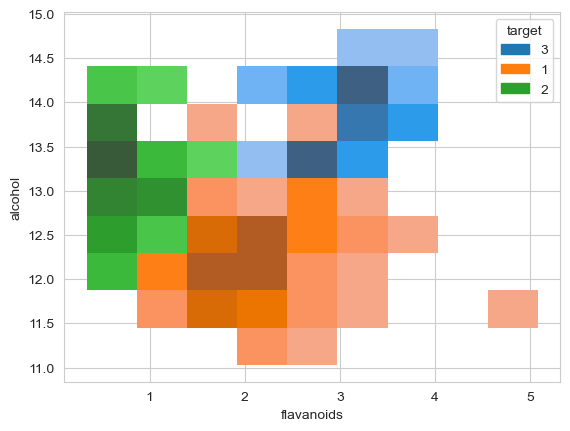

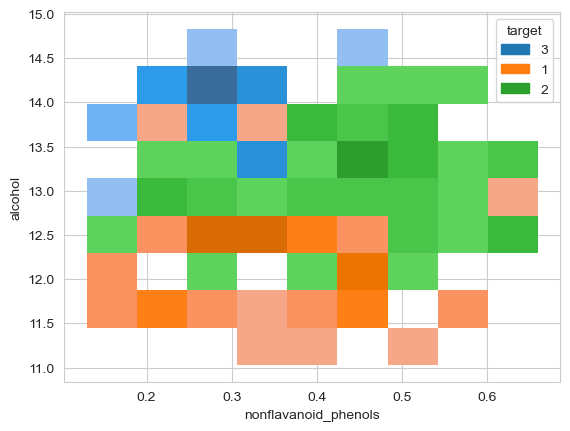

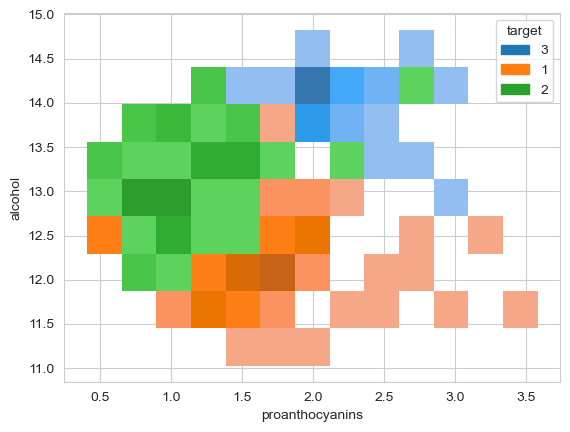

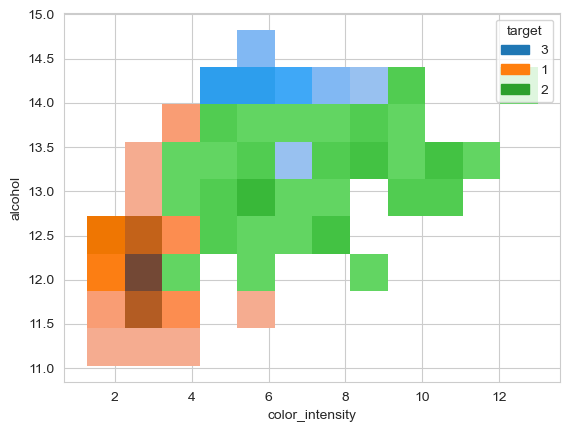

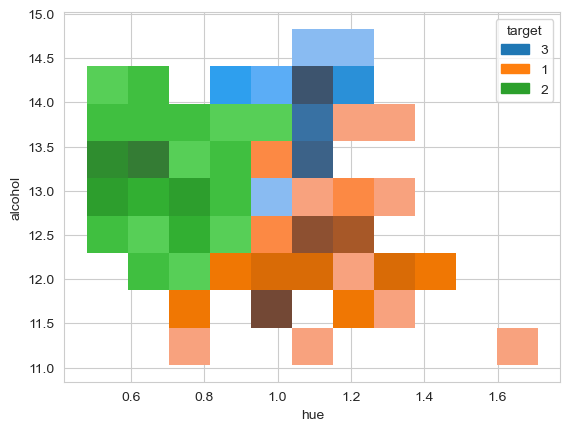

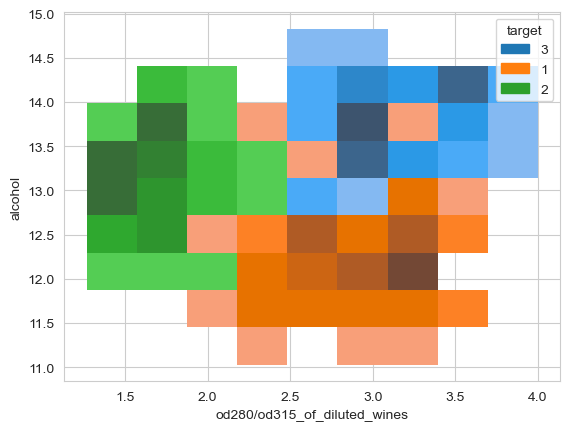

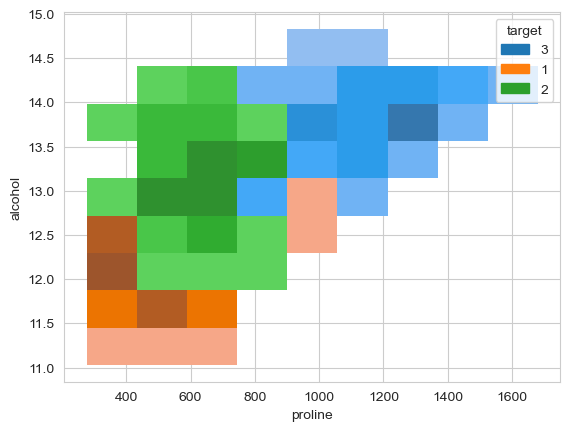

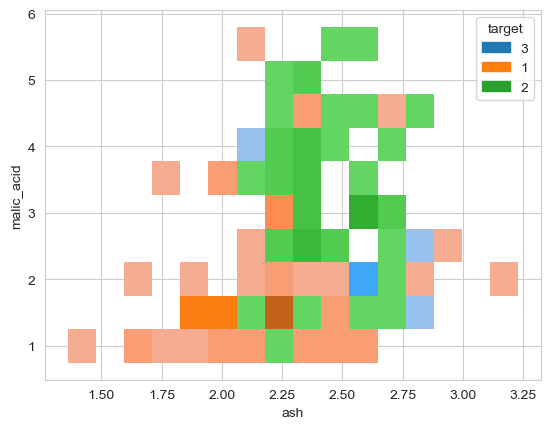

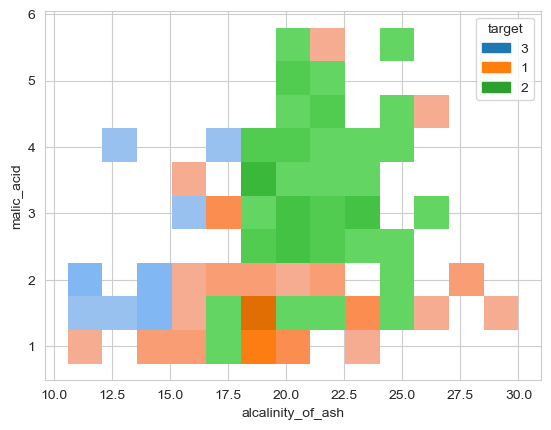

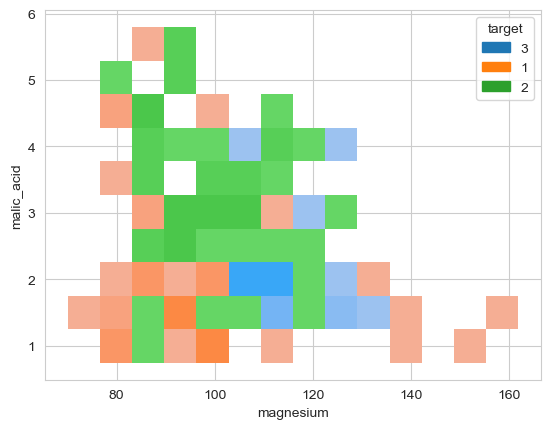

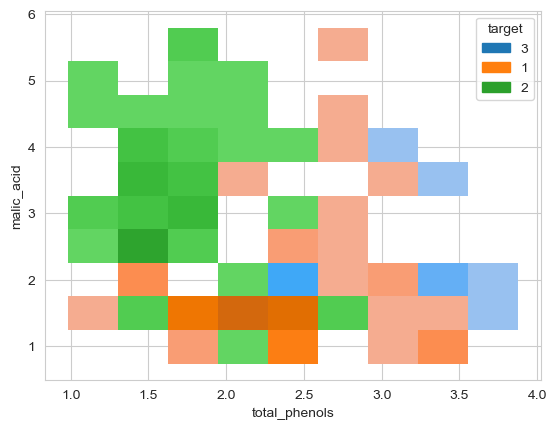

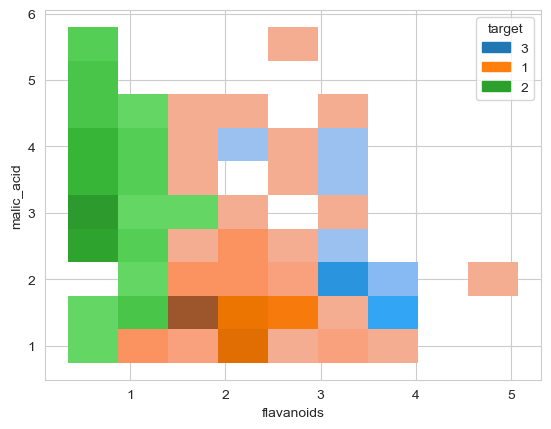

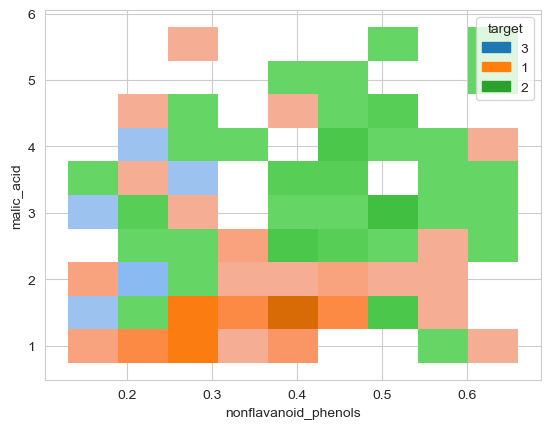

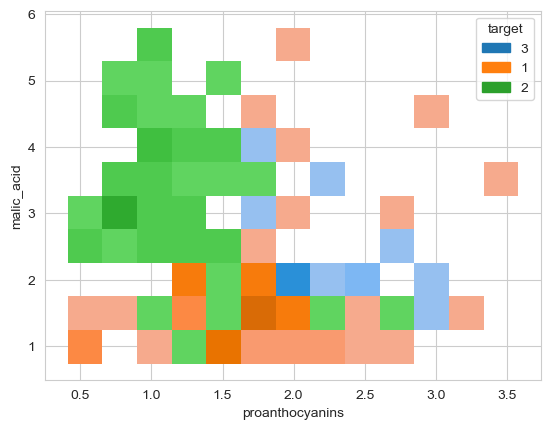

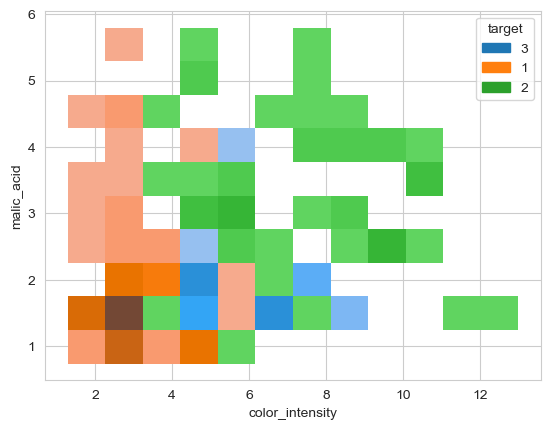

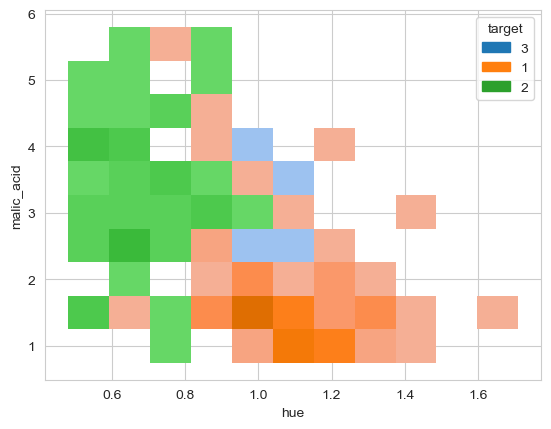

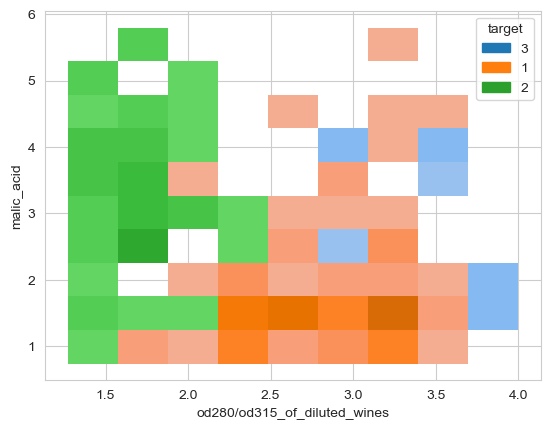

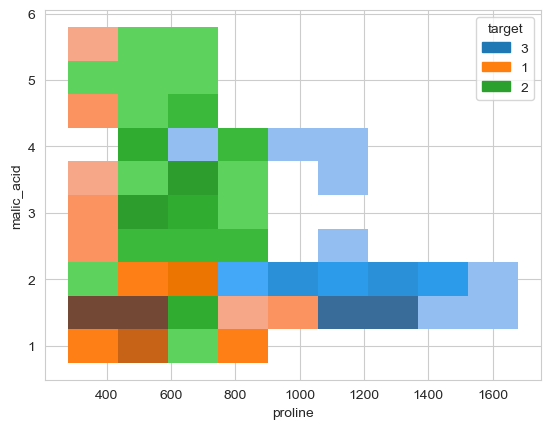

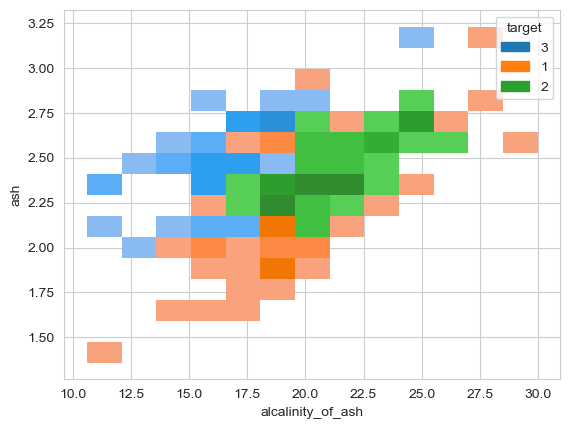

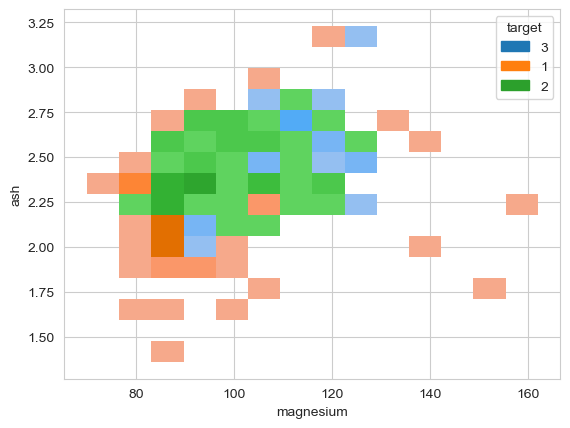

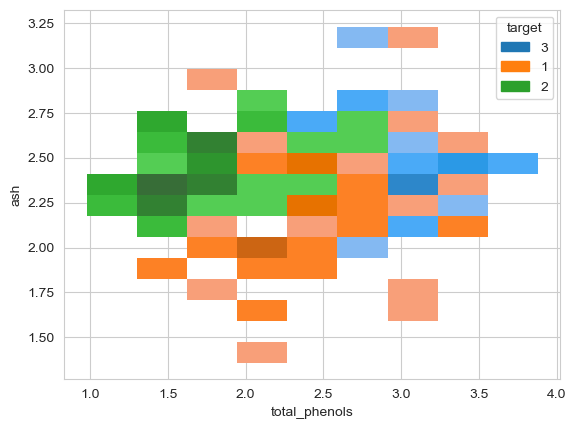

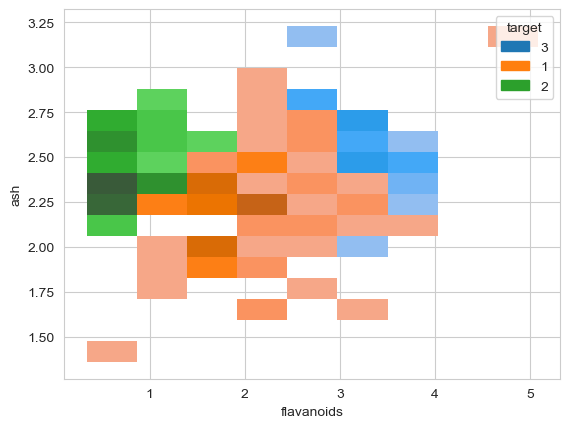

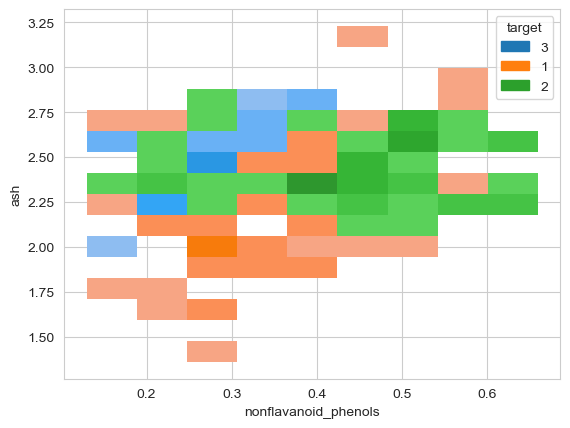

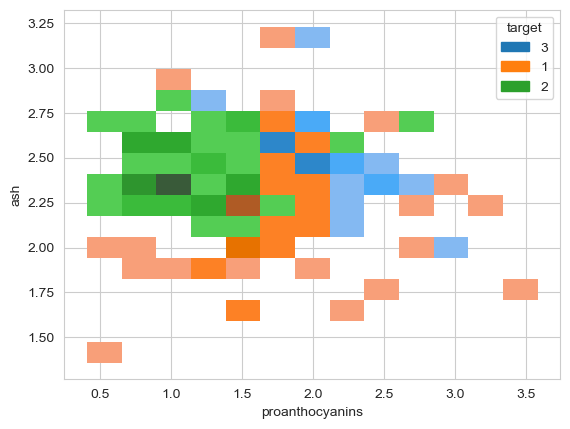

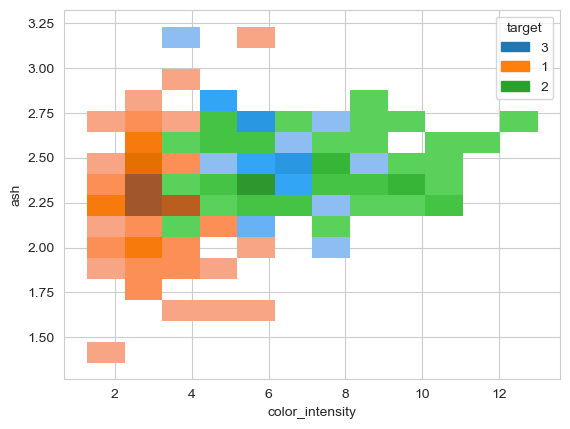

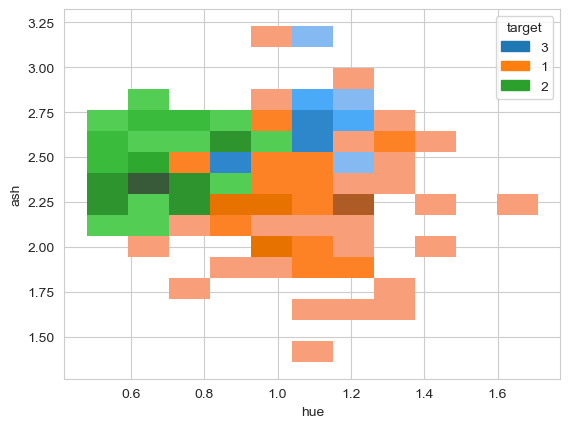

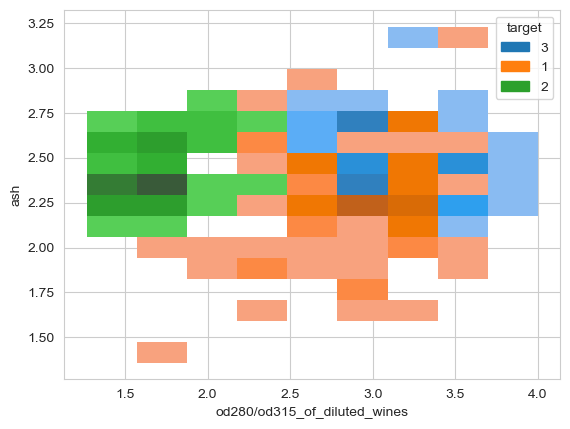

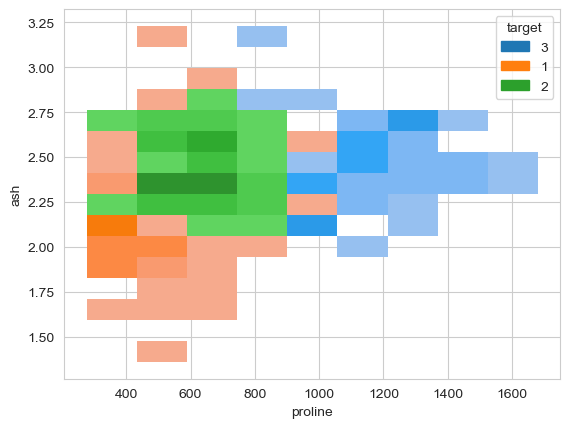

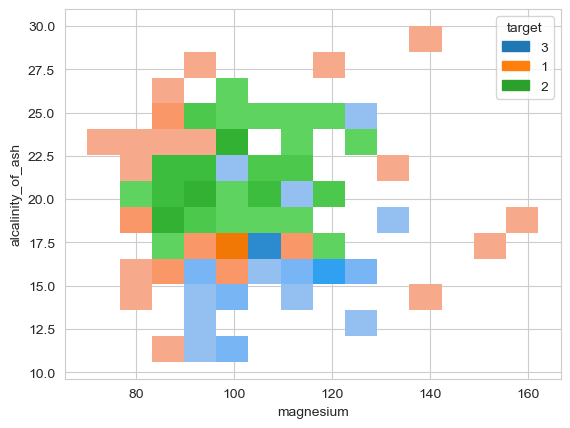

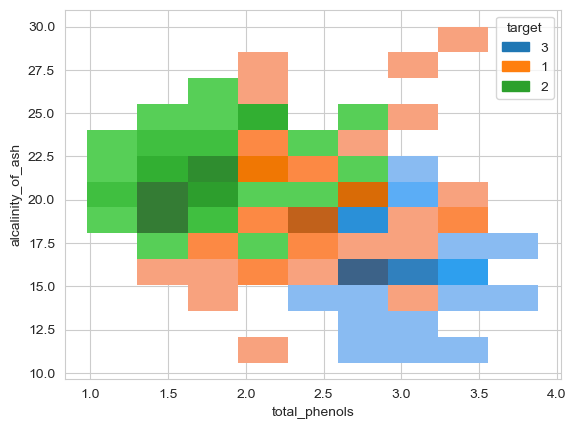

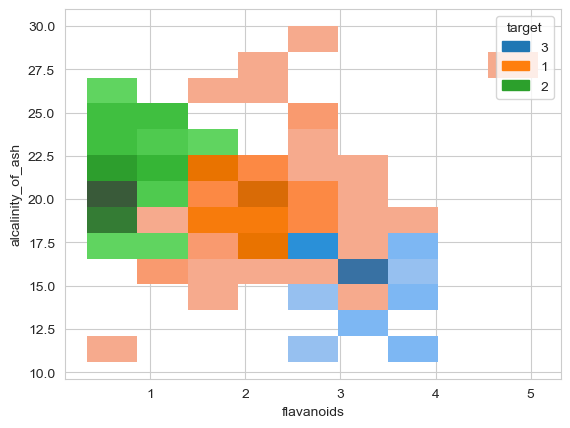

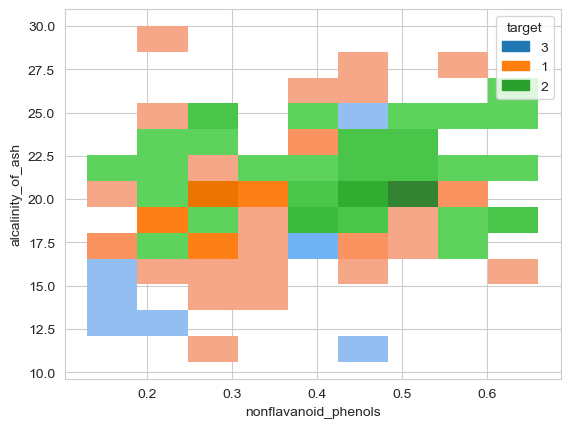

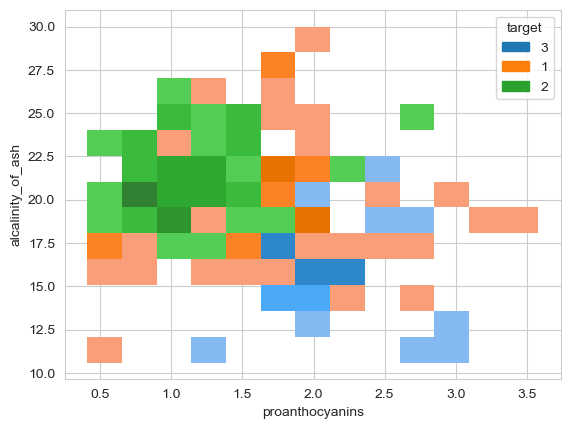

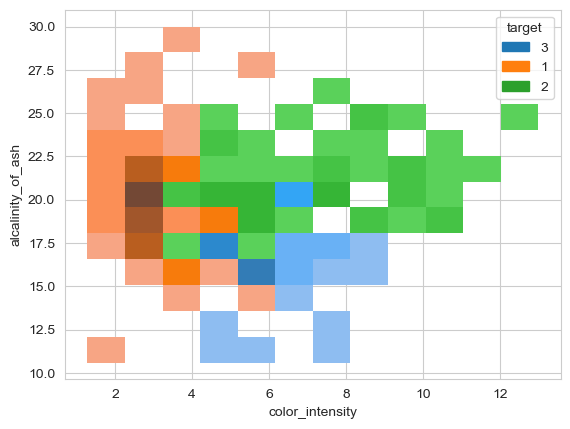

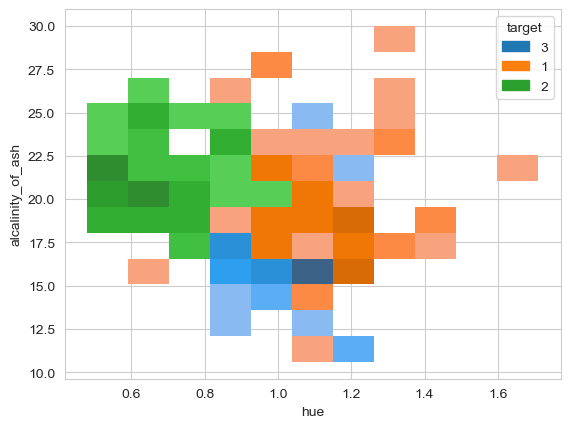

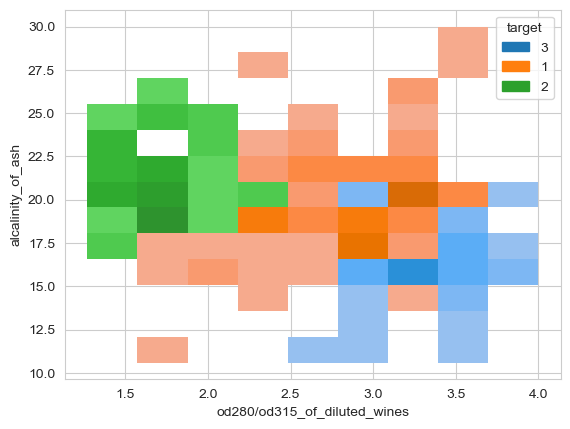

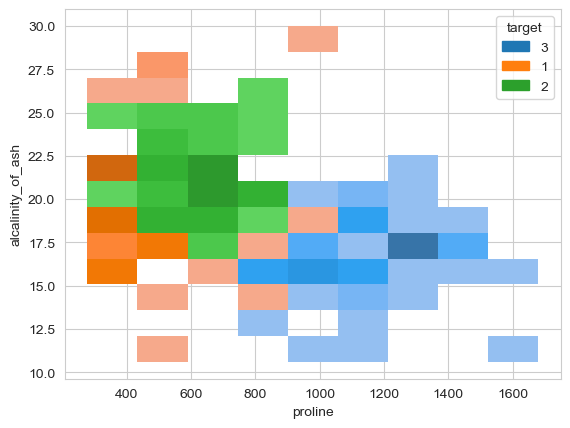

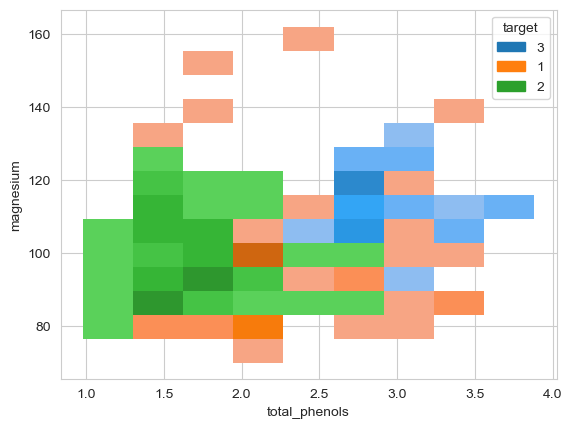

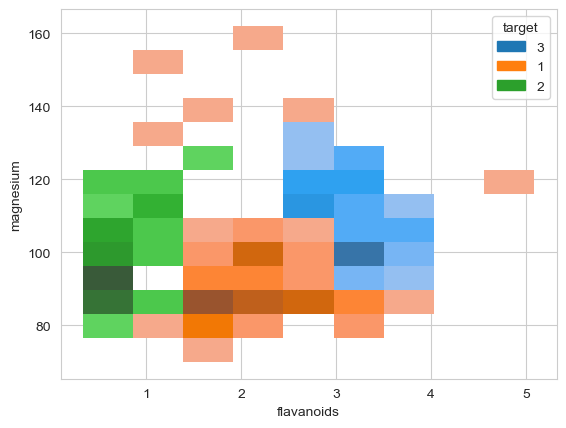

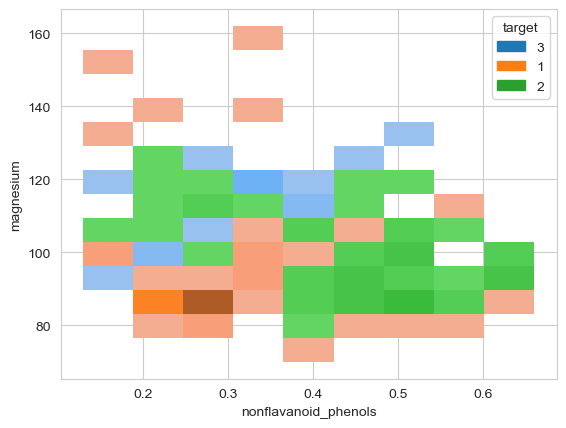

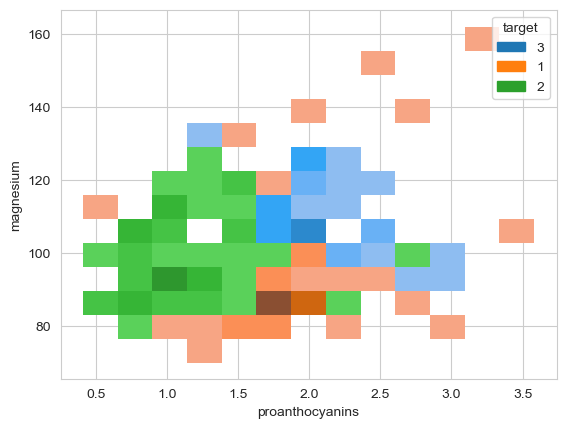

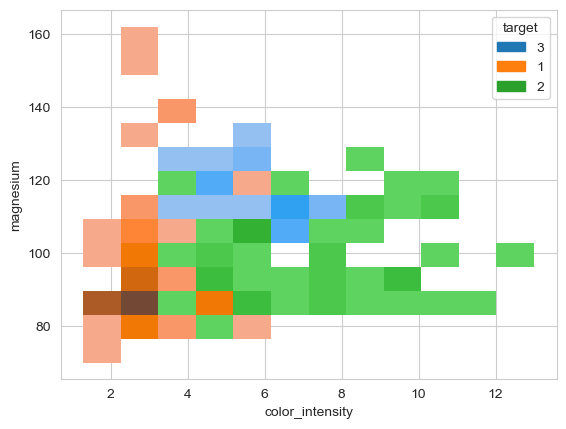

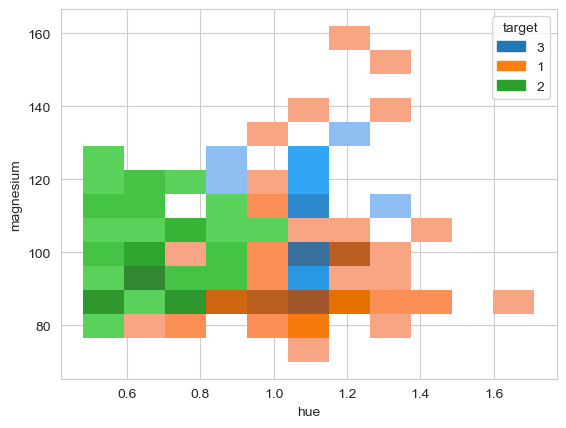

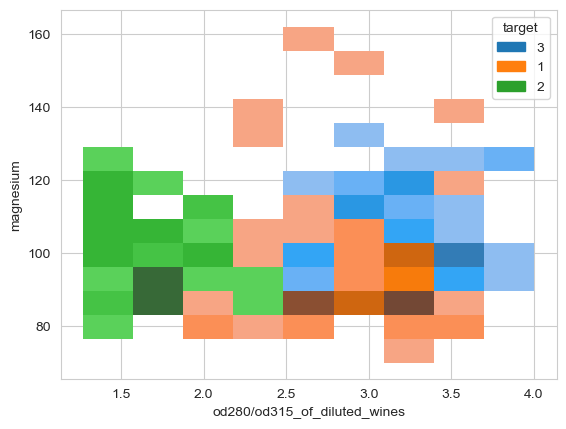

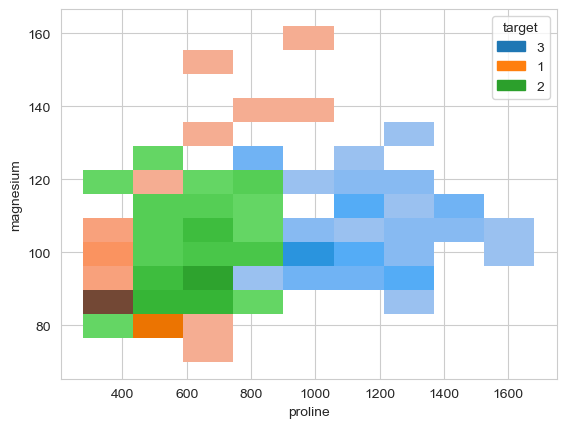

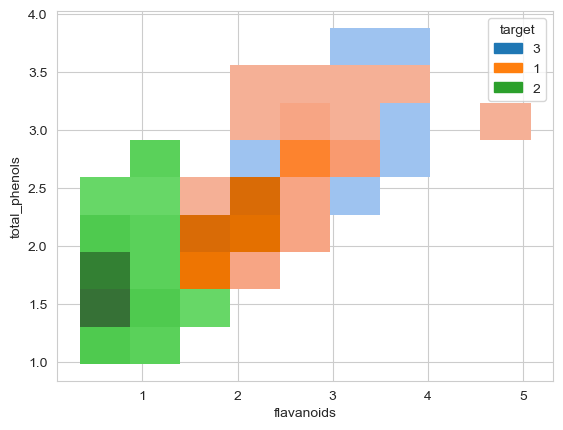

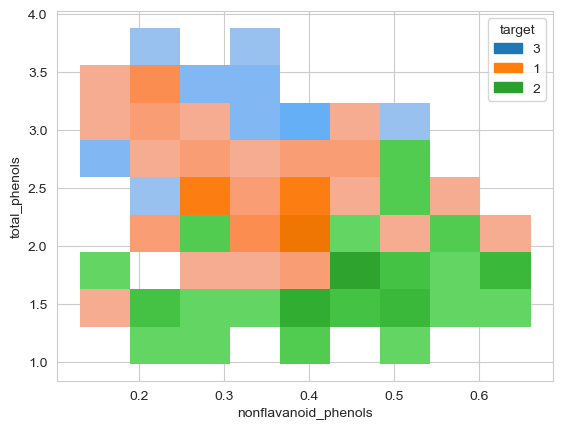

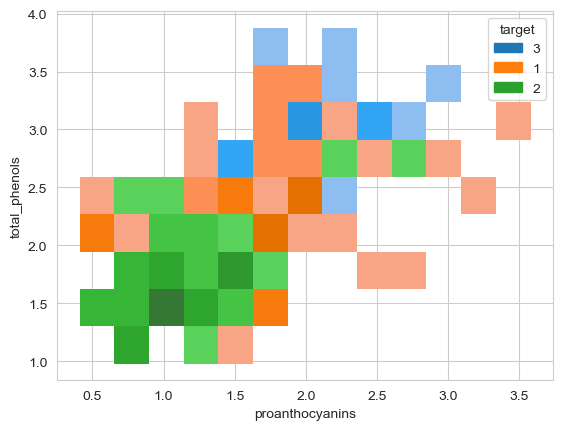

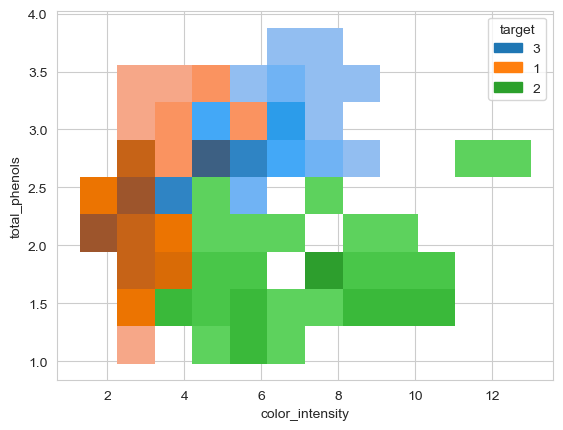

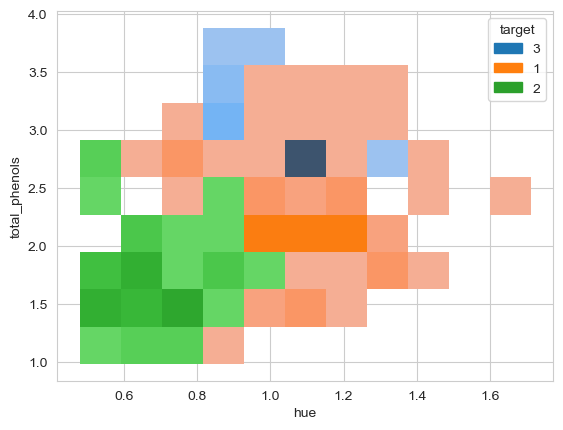

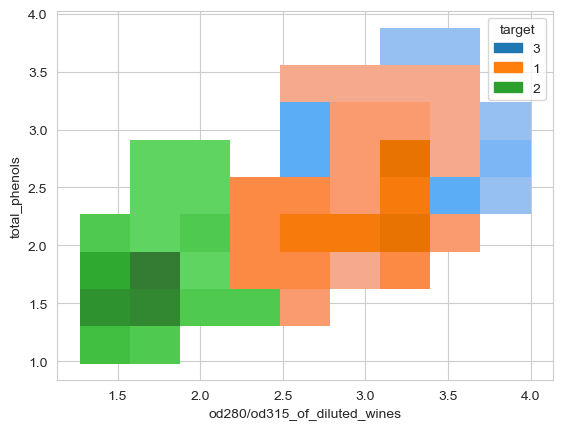

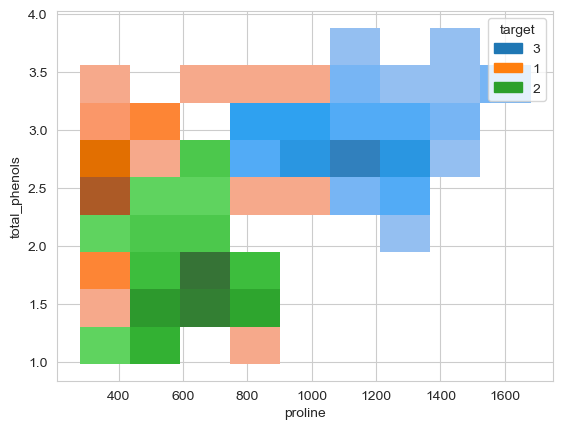

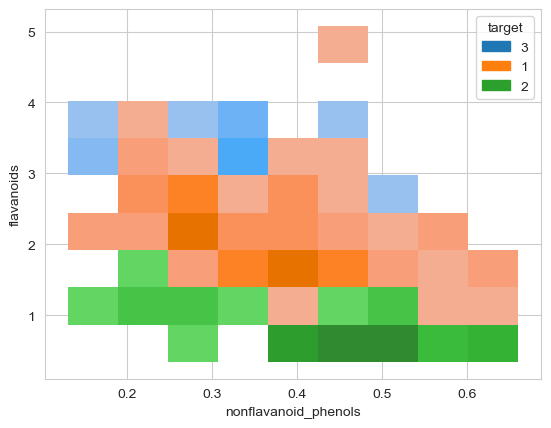

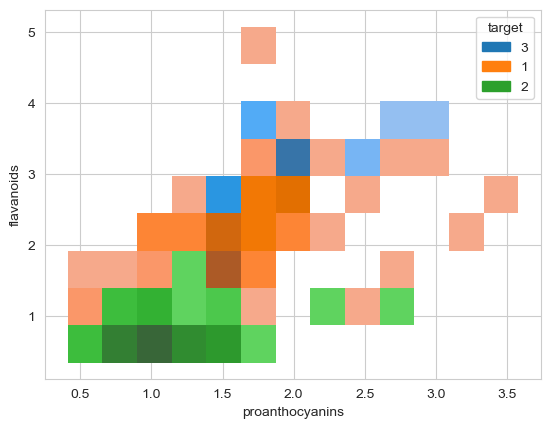

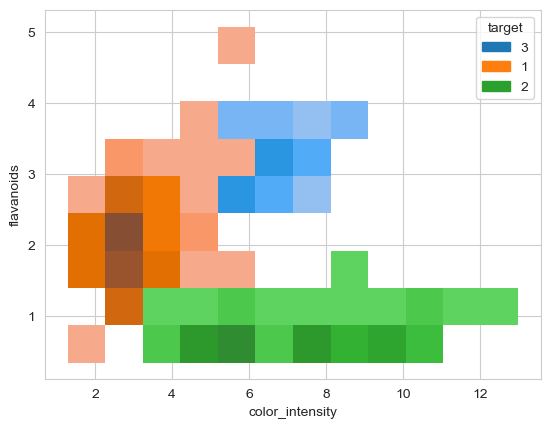

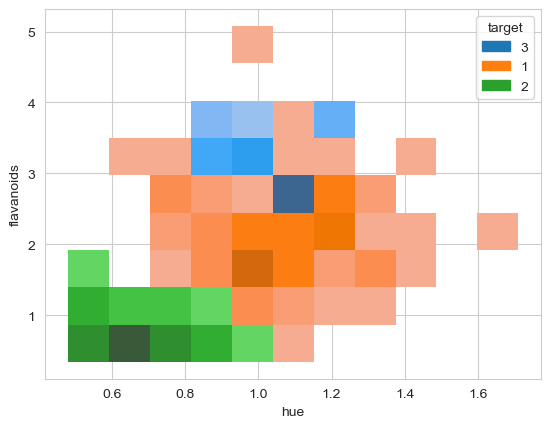

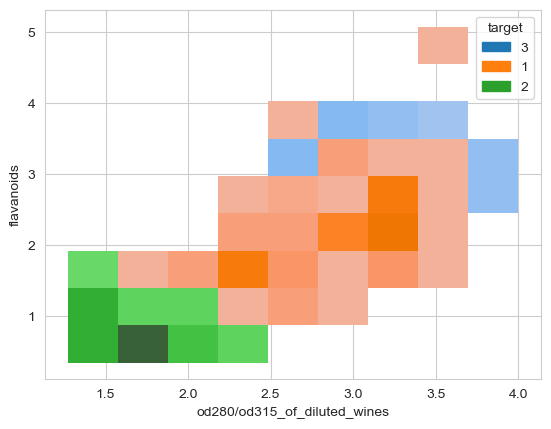

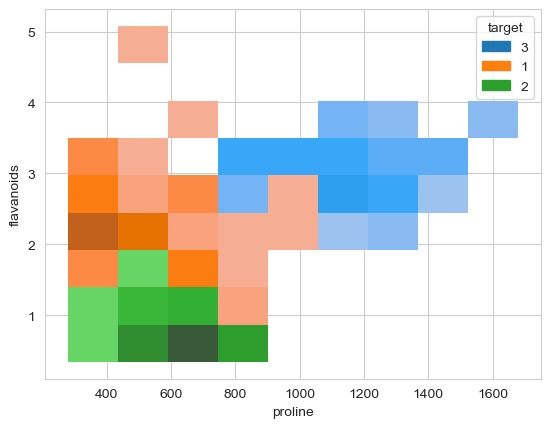

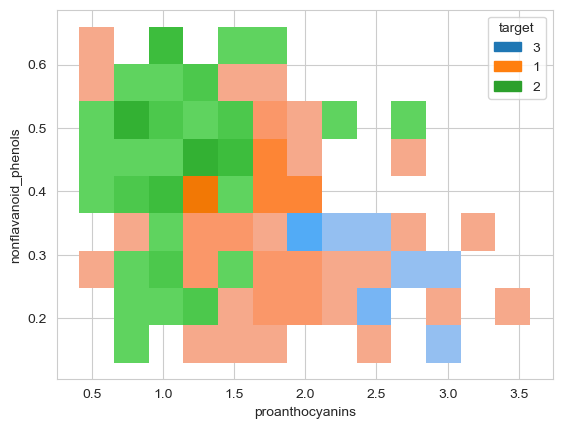

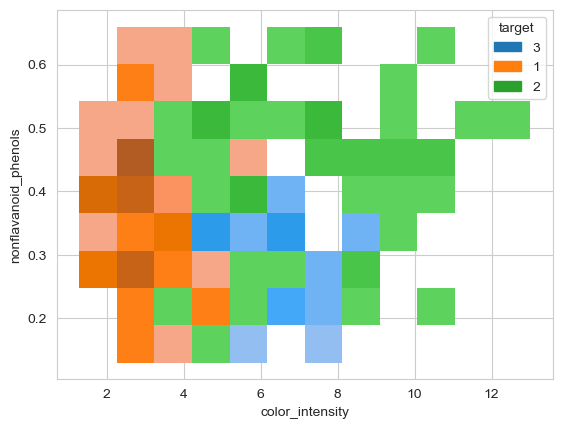

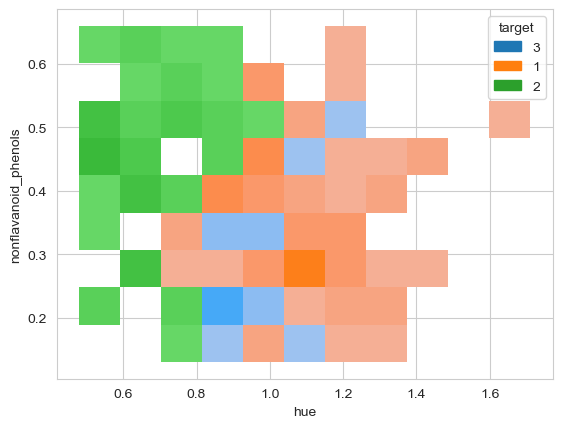

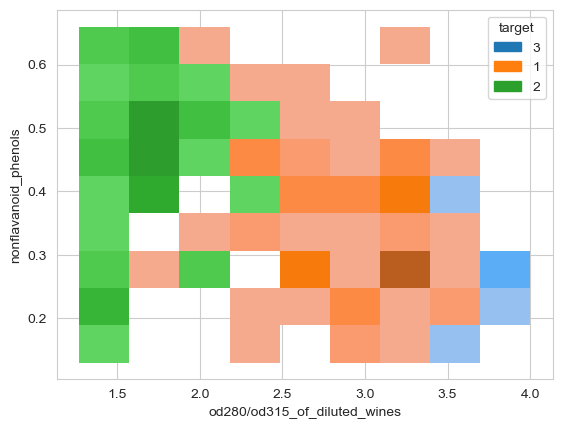

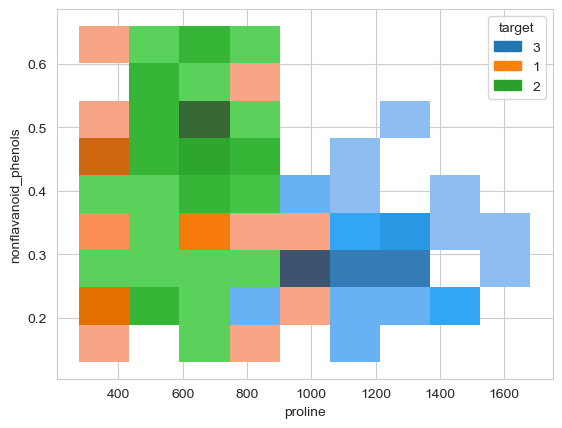

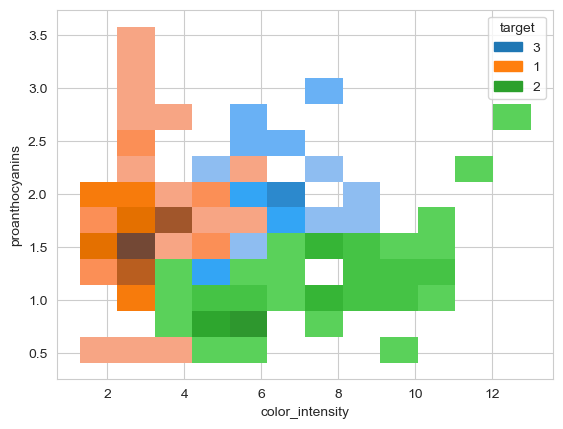

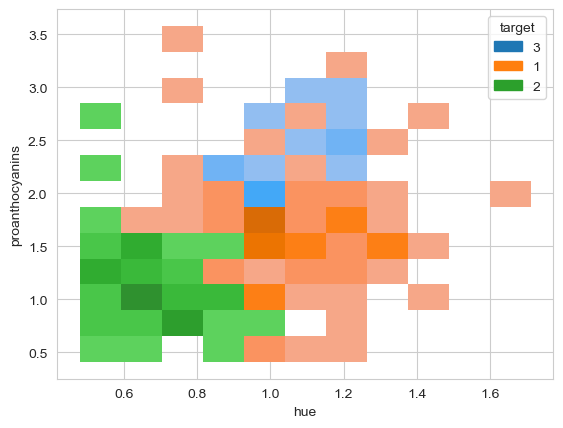

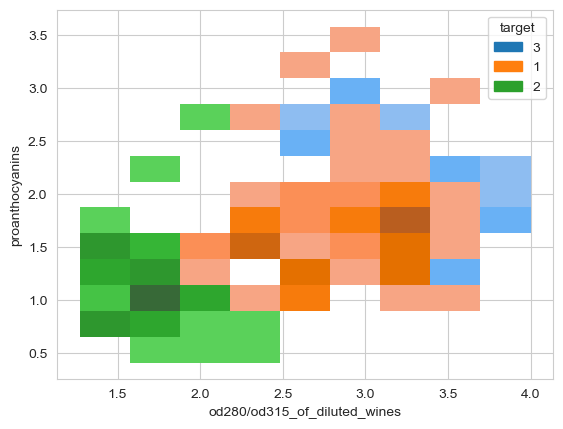

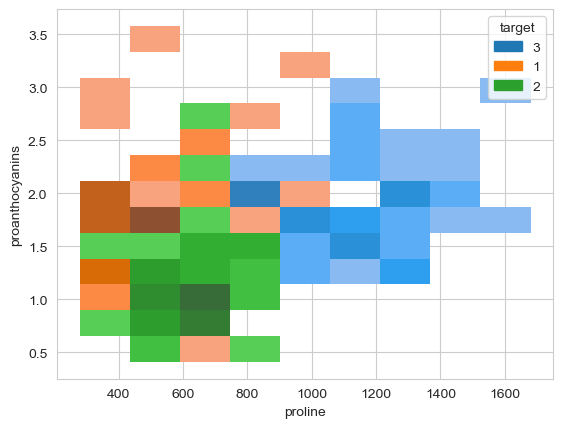

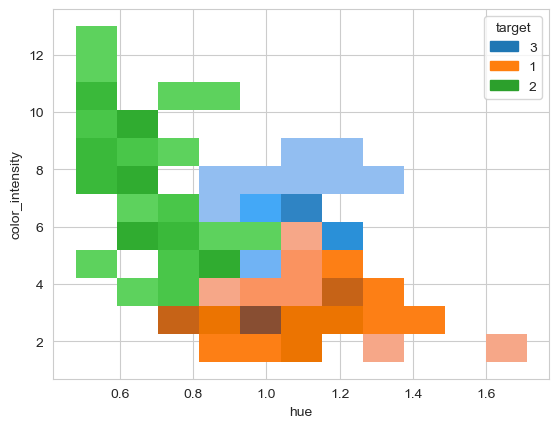

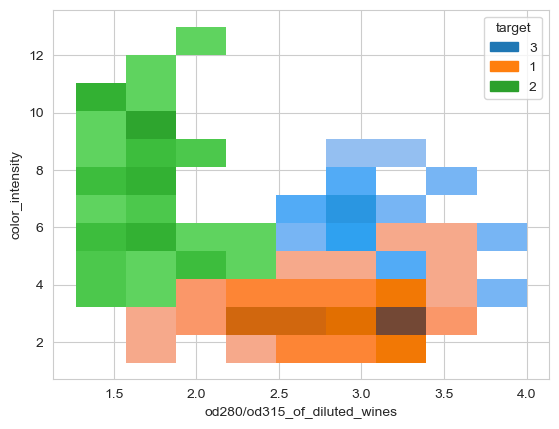

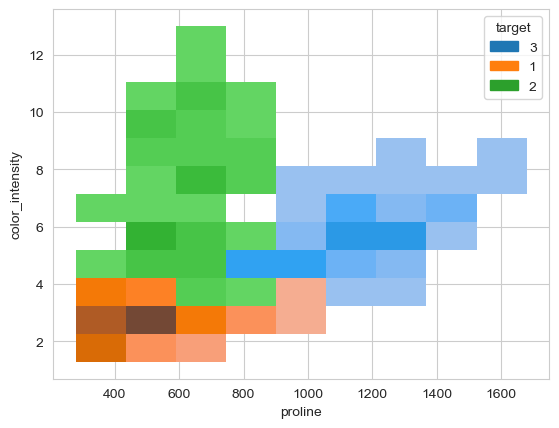

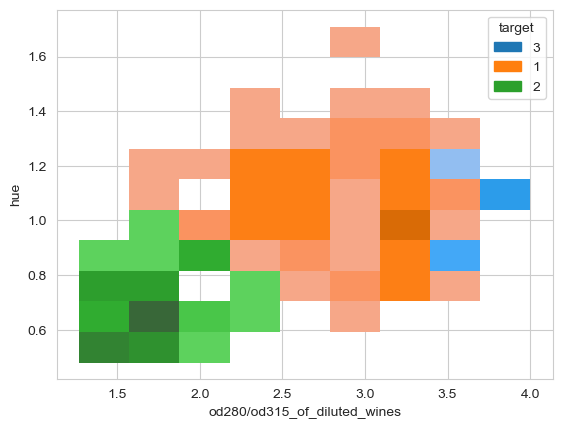

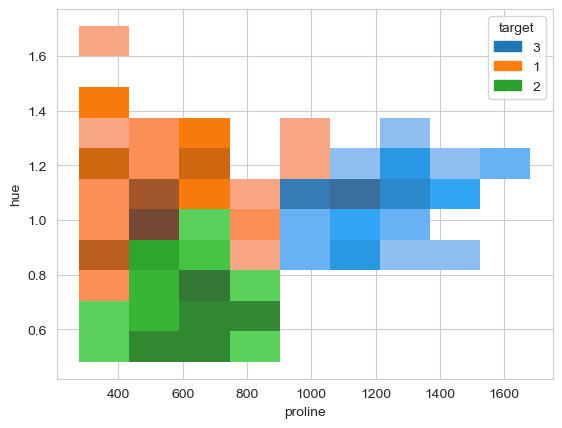

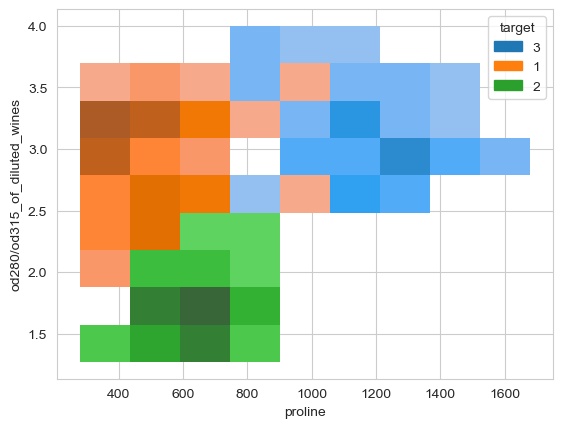

In [114]:
output_var='target'
for i in num_cols1:
    for j in num_cols2:
        if i == j:
            pass
        else:
            sns.histplot( hue=output_var, x=j,y=i, data=wine_df,kde=True)
            plt.show()
    num_cols2.pop(0)

# 10. Data Transformation

In [115]:
wine_df.select_dtypes(exclude='object').columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

# 11. Standization - Normalization

# 12. Convert Cat - to - Numerical Columns

In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wine_df['target']=le.fit_transform(wine_df['target'])

# 13. SMOTE for Balancing Data

# ML Models

In [117]:
Y=wine_df["target"]
X=wine_df.drop(["target"],axis='columns')
print(len(Y),len(X))
print(X.columns)

178 178
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [119]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.7535211267605634
accuracy test score overall : 0.75
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.43      0.38      0.40         8
           2       0.87      0.93      0.90        14

    accuracy                           0.75        36
   macro avg       0.69      0.70      0.69        36
weighted avg       0.74      0.75      0.74        36

[[11  3  0]
 [ 3  3  2]
 [ 0  1 13]]


C:\Users\91956\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


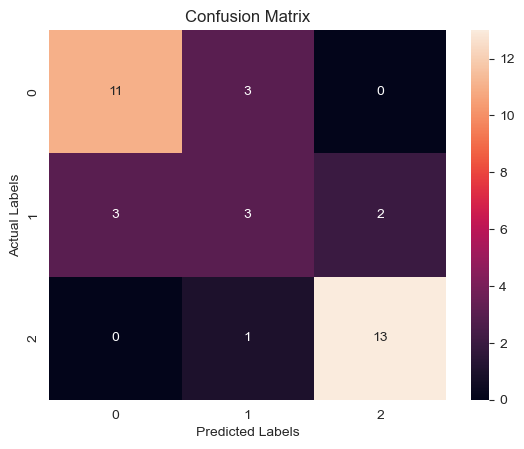

In [120]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, Y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, Y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, Y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GaussianNB

Model-GaussianNB
train score 0.971830985915493
test score 1.0
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.43      0.38      0.40         8
           2       0.87      0.93      0.90        14

    accuracy                           0.75        36
   macro avg       0.69      0.70      0.69        36
weighted avg       0.74      0.75      0.74        36

[[11  3  0]
 [ 3  3  2]
 [ 0  1 13]]


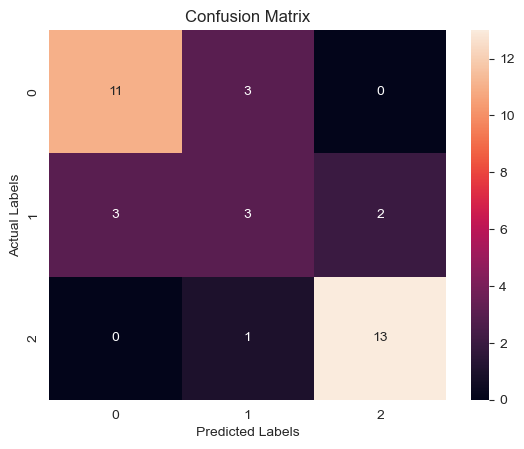

In [121]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,Y_train))
print("test score",gnb_model.score(X_test,Y_test))

y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

# Suport Vector Machine - Classifier

model-Suport Vector Machine - kernel - linear -Classifier
Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0  8  0]
 [ 0  0 14]]


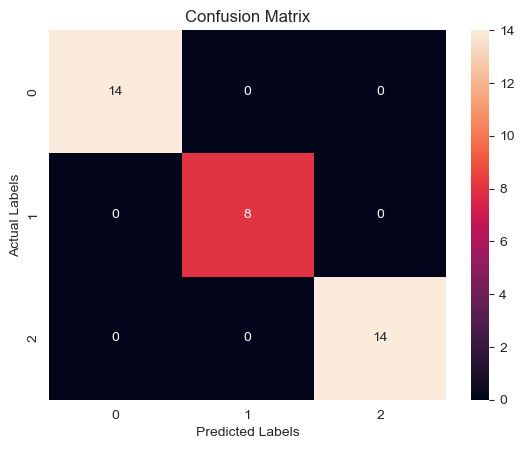

In [122]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_linear_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - kernel - linear -Classifier")

y_pred = svm_linear_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_linear_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -rbf - Classifier
Train Accuracy: 0.6901408450704225
Test Accuracy: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.57      0.50      0.53         8
           2       1.00      1.00      1.00        14

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36

[[11  3  0]
 [ 4  4  0]
 [ 0  0 14]]


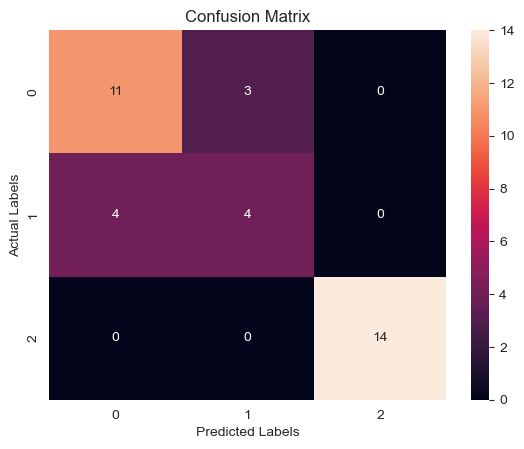

In [123]:
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_rbf_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -rbf - Classifier")
y_pred = svm_rbf_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_rbf_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -poly - Classifier
Train Accuracy: 0.647887323943662
Test Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       1.00      0.25      0.40         8
           2       1.00      1.00      1.00        14

    accuracy                           0.83        36
   macro avg       0.90      0.75      0.74        36
weighted avg       0.88      0.83      0.80        36

[[14  0  0]
 [ 6  2  0]
 [ 0  0 14]]


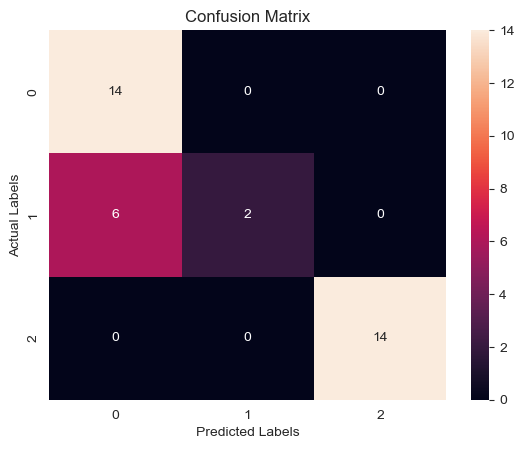

In [124]:
svm_poly_classifier = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_poly_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -poly - Classifier")

y_pred = svm_poly_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_poly_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Decision Tree

Model-Decion Tree
train score: 1.0
test score: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.88      0.93         8
           2       0.93      0.93      0.93        14

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

[[14  0  0]
 [ 0  7  1]
 [ 1  0 13]]


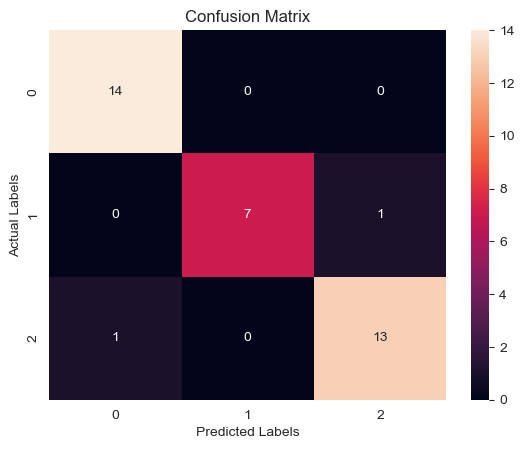

In [125]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, Y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Random Forest

Model- Random Forest Tree
train score: 1.0
test score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[14  0  0]
 [ 0  8  0]
 [ 0  0 14]]


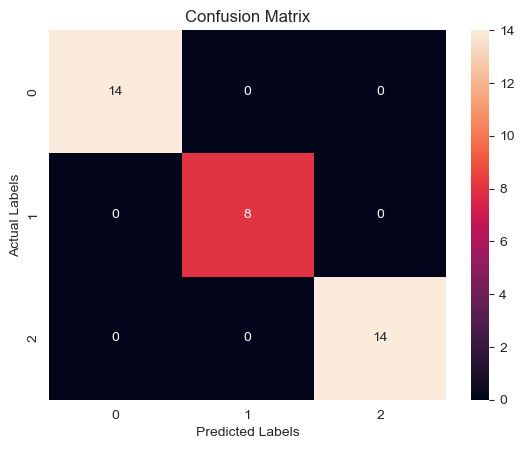

In [126]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, Y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## AdaBoost 

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model-AdaBoost
train score 0.9225352112676056
test score: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.88      0.93         8
           2       1.00      0.86      0.92        14

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36

[[14  0  0]
 [ 1  7  0]
 [ 2  0 12]]


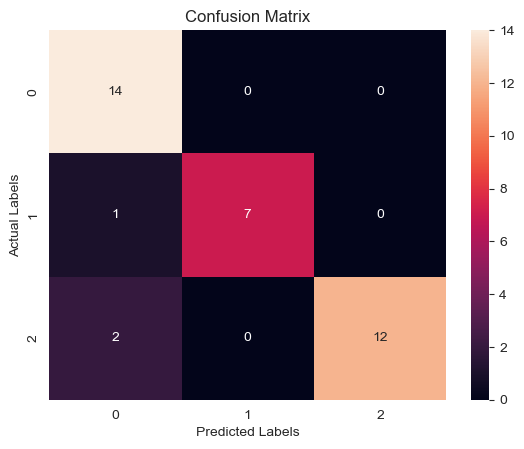

In [127]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, Y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, Y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"test score: {accuracy}")

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.88      0.93         8
           2       1.00      0.86      0.92        14

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36

[[14  0  0]
 [ 1  7  0]
 [ 2  0 12]]


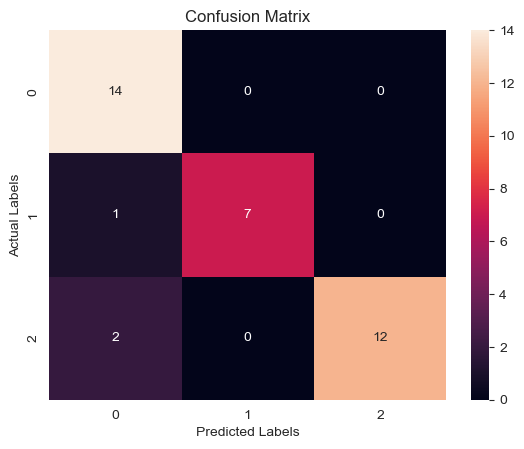

In [128]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, Y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## XGBClassifier

model- XGB Classifier
Train Accuracy: 1.0
Test Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.93         8
           2       1.00      0.93      0.96        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

[[14  0  0]
 [ 1  7  0]
 [ 1  0 13]]


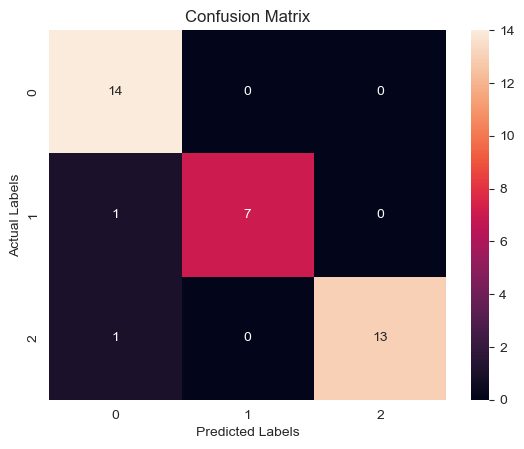

In [129]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

$ Conclusion $
1. In this Notebook - We did not use the Data Transformations and Scaling
2. Using Gausian NB - Accuracy is 1 but f-1 acore across the classes is varying
3. Using Decision Tree - We got both Accuracy and F-1 Score 
4. Holds Good in Random Forest, Ada Boost , Gradient Boost, XG Boost.
5. SVM - linear (kernel) - we got accuracy and F-1 Score.
